## Project:
HELP International has been able to raise around $ 10 million. Now the CEO of the NGO needs
to decide how to use this money strategically and effectively. So, the CEO has to make a decision
to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to
categorize the countries using some socio-economic and health factors that determine the overall
development of the country. Your objective is to categorize the countries using socio-economic
and health factors that determine the overall development of the country.<BR>

<B>Dataset : </B>  <a href="https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data"> Country_Data </a>

### Objective

To categorise/cluster the countries using socio-economic and health factors that determine the overall development of the country.


### Dataset Features:

country : Name of the country<BR>
child_mort : Death of children under 5 years of age per 1000 live births<BR>
exports : Exports of goods and services per capita. Given as %age of the GDP per capita<BR>
health : Total health spending per capita. Given as %age of GDP per capita<BR>
imports : Imports of goods and services per capita. Given as %age of the GDP per capita<BR>
Income : Net income per person<BR>
Inflation : The measurement of the annual growth rate of the Total GDP<BR>
life_expec : The average number of years a new born child would live if the current mortality patterns are to remain the same.<BR>
total_fer : The number of children that would be born to each woman if the current age-fertility rates remain the same.<BR>
gdpp : The GDP per capita. Calculated as the Total GDP divided by the total population.<BR>

## Requirements
!pip install kneed

## Import Libraries

In [17]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Warnings
import warnings
warnings.simplefilter(action='ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import scipy.cluster.hierarchy as sch

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

## Import Dataset

In [19]:
df = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")
X = df.iloc[:,1:]
y = df.iloc[:,0]

## Data Pre-Processing

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [21]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [22]:
df.describe().T[['min','max','mean']]

,min,max,mean
child_mort,2.6000,208.00,38.270060
exports,0.1090,200.00,41.108976
health,1.8100,17.90,6.815689
imports,0.0659,174.00,46.890215
income,609.0000,125000.00,17144.688623
inflation,-4.2100,104.00,7.781832
life_expec,32.1000,82.80,70.555689
total_fer,1.1500,7.49,2.947964
gdpp,231.0000,105000.00,12964.155689


### Checking NULL values

In [23]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Feature Scaling

<b> NB: Toggle between the below 3 feature scaling methods to find the best model prediction. Use one block at a time. <b>

In [24]:
# Using both StandardScaler & MinMax
scaler = StandardScaler()
minmax = MinMaxScaler()

X_scaled = X.copy(deep = True)
X_scaled['health'] = scaler.fit_transform(X_scaled[['health']]) 

col_without_health = X.drop('health', axis = 1)
for i in col_without_health.columns:
    X_scaled[i] = minmax.fit_transform(X_scaled[[i]])

## Data Visualization

### Correlation Matrix

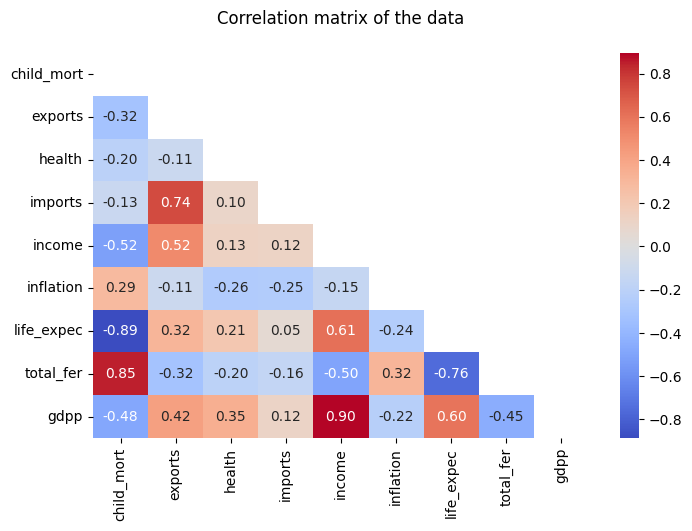

In [25]:
plt.figure(figsize = (8,5))
mask = np.triu(X.corr())
hm = sns.heatmap(X.corr(), cmap= 'coolwarm', annot = True , fmt='.2f', mask=mask)
hm.set(title = "Correlation matrix of the data\n")
plt.show()

 According to above heatmap:

 Income ↑  , gdpp ↑   ----->   Child-mort ↓ <br>
 Child-mort ↑             ----->   Life-exp ↓ <br>
 Total-fer ↑                 ----->   Child-mort ↑ <br>
 Export ↑                    ----->   Income ↑ <br>
 Income ↑                   ----->   Life-exp ↑ <br>
 Income ↑                   ----->   Total-fer ↓ <br>
 Life-exp ↑                  ----->   Total-fer ↓ <br>
 Life-exp ↑                  ----->   GDPP ↑

According to above heatmap, we see that:
- gdp depends on 'income', 'life_expec', 'exports', 'health' <br>
- (life_expec,gdp) are more dependant on 'health' <br>
- life_expec depends on 'income'

### Feature Distribution

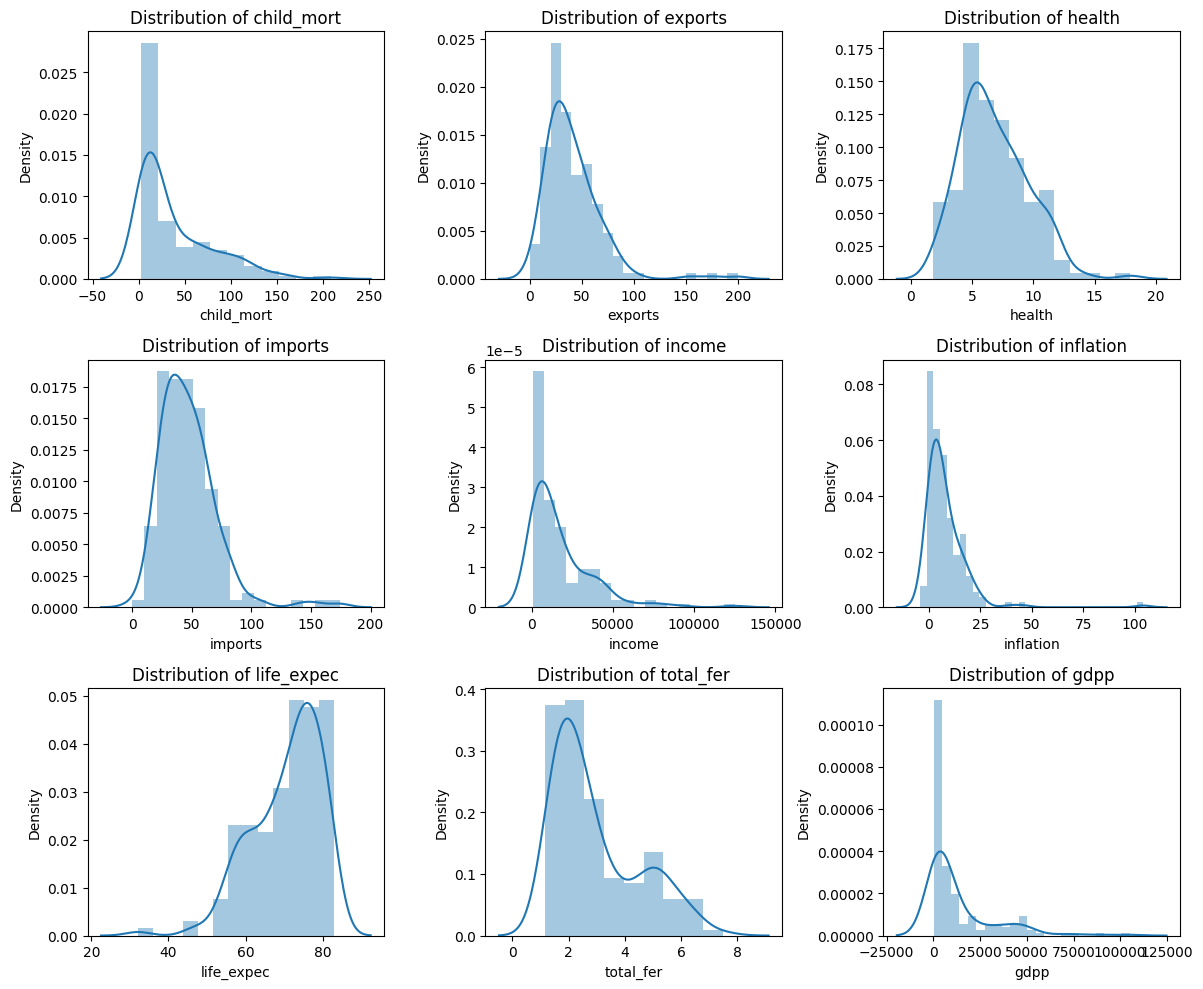

In [26]:
col = X.columns
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (12,10))
for i in range(0, 9):  # Number of the numerical features = 9
    plt.subplot(3,3,i+1)
    sns.distplot(X[col[i]], kde=True)
    title = 'Distribution of ' + col[i]
    plt.title(title)
plt.tight_layout()
plt.show()

- Health data follows a normal distribution. <br>
- Life-exp is skewed to the left. <br>
- The rest are skewed to the right. (positive skewness) <br>

### Pair Plots

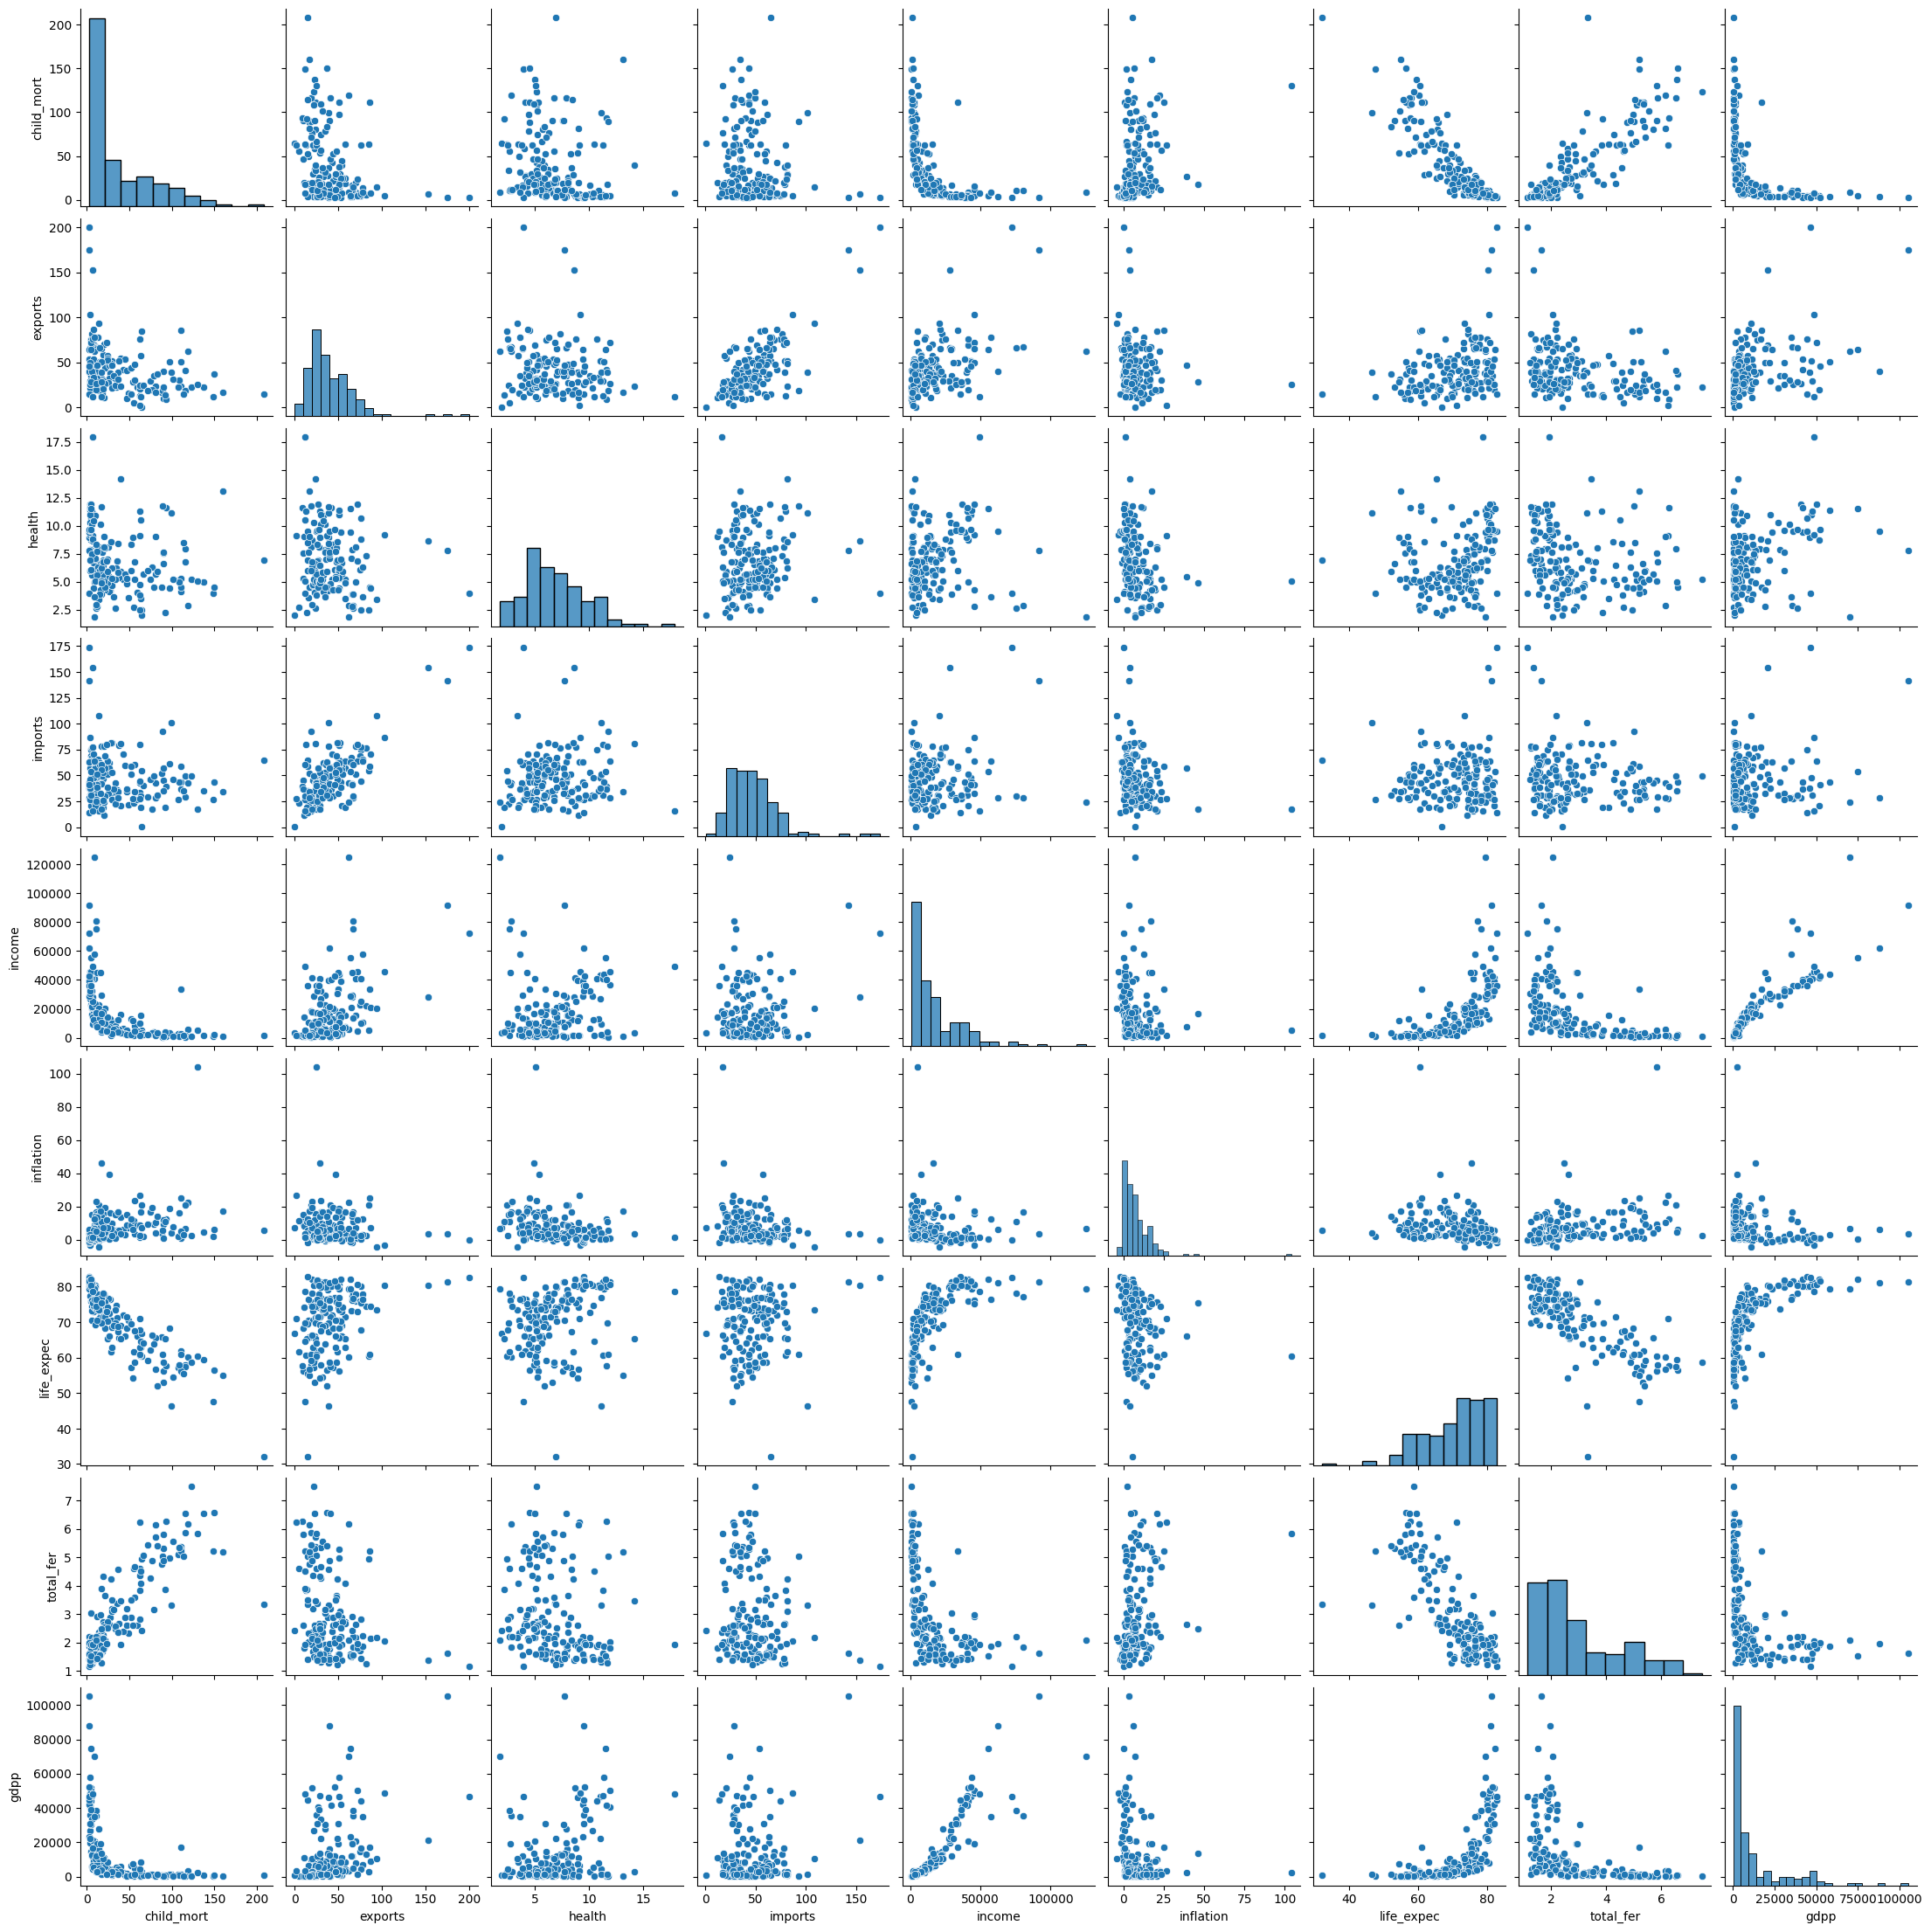

In [27]:
sns.pairplot(df)
plt.show()

### Pie Charts

#### a) Child Mortality

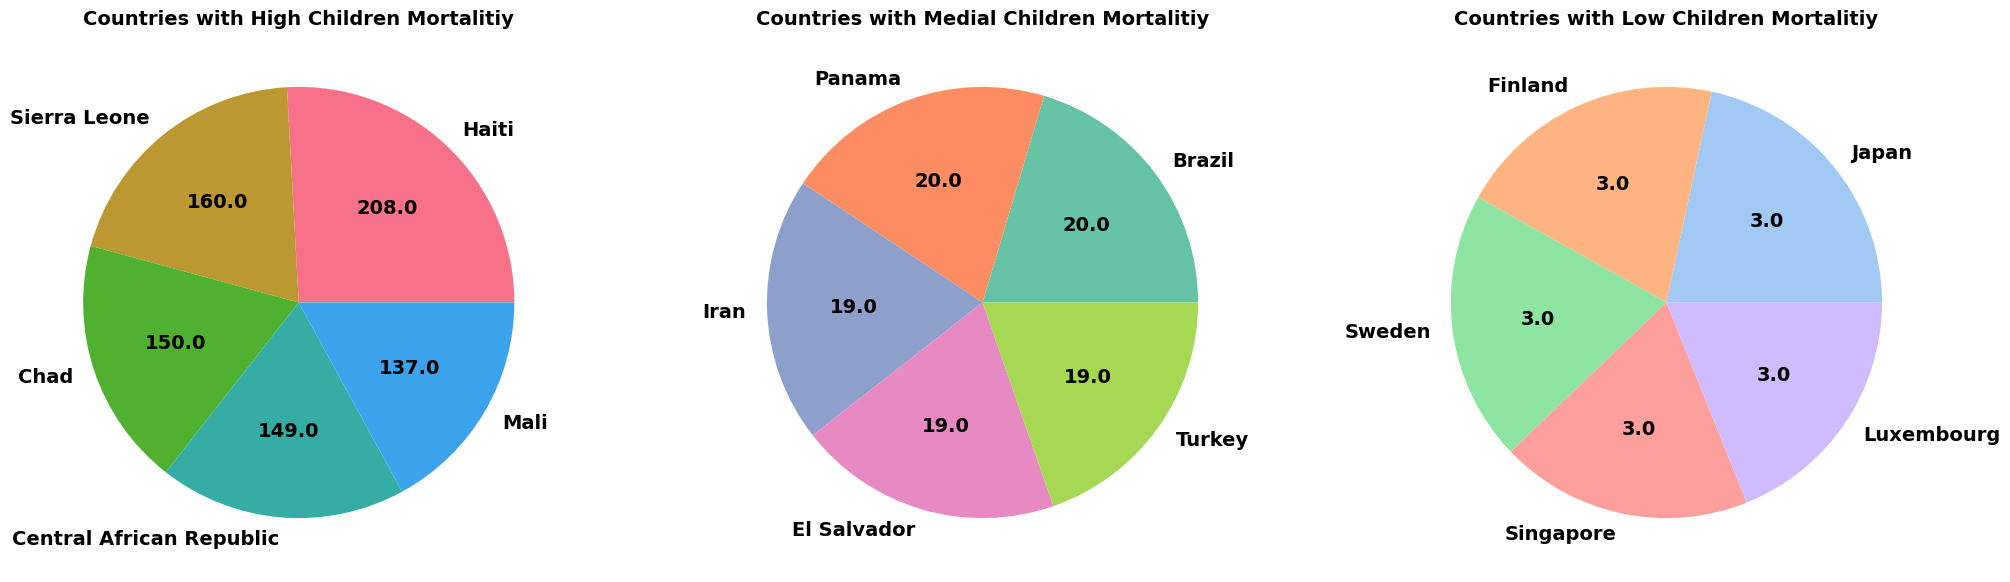

In [28]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

# To show the actual values not percents
def absolute_value(val): 
    a  = np.round(val/100.*data['child_mort'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[:5]
palette_color = sns.color_palette('husl')
plt.title('Countries with High Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'child_mort').iloc[161:166]
palette_color = sns.color_palette('pastel') 
plt.title('Countries with Low Children Mortalitiy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['child_mort'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show()    

Haiti,located in Central America, has the highest number of child mortality. Most African countries are also seen in these statistics. <br>
On the other hand, European countries and some Asian countries have the lowest child mortality rate.

#### b) Exports

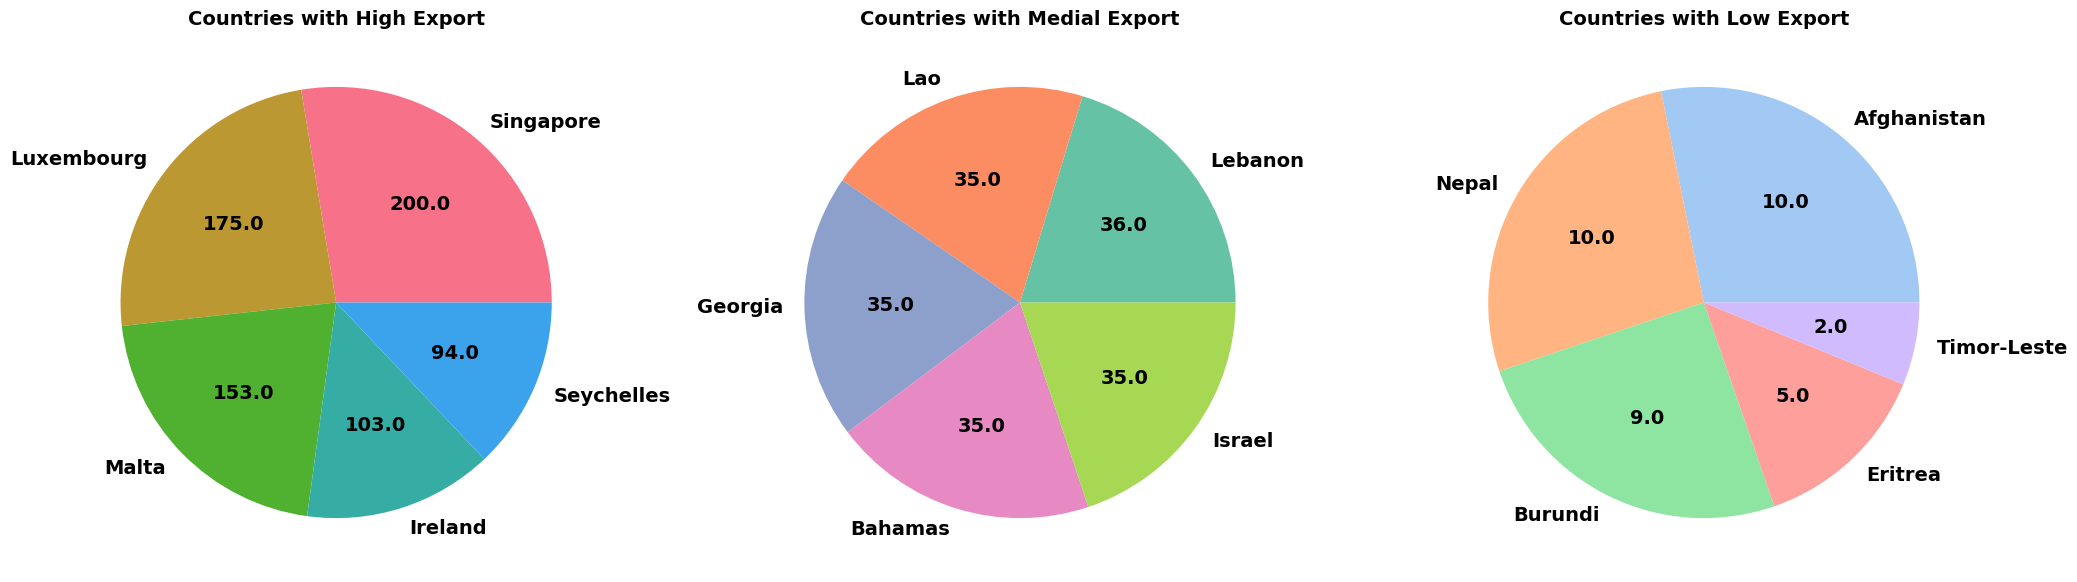

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['exports'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'exports').iloc[:5]
palette_color = sns.color_palette('husl')
plt.title('Countries with High Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'exports').iloc[81:86]
palette_color = sns.color_palette('Set2') # define Seaborn color palette to use
plt.title('Countries with Medial Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'exports').iloc[161:166]
palette_color = sns.color_palette('pastel')
plt.title('Countries with Low Export', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['exports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show()  

Singapore accounts for the largest number of exports. European countries also have the highest amount. <br>
Afghanistan and Nepal have low exports. Most African countries are also in this category.

#### c) Health

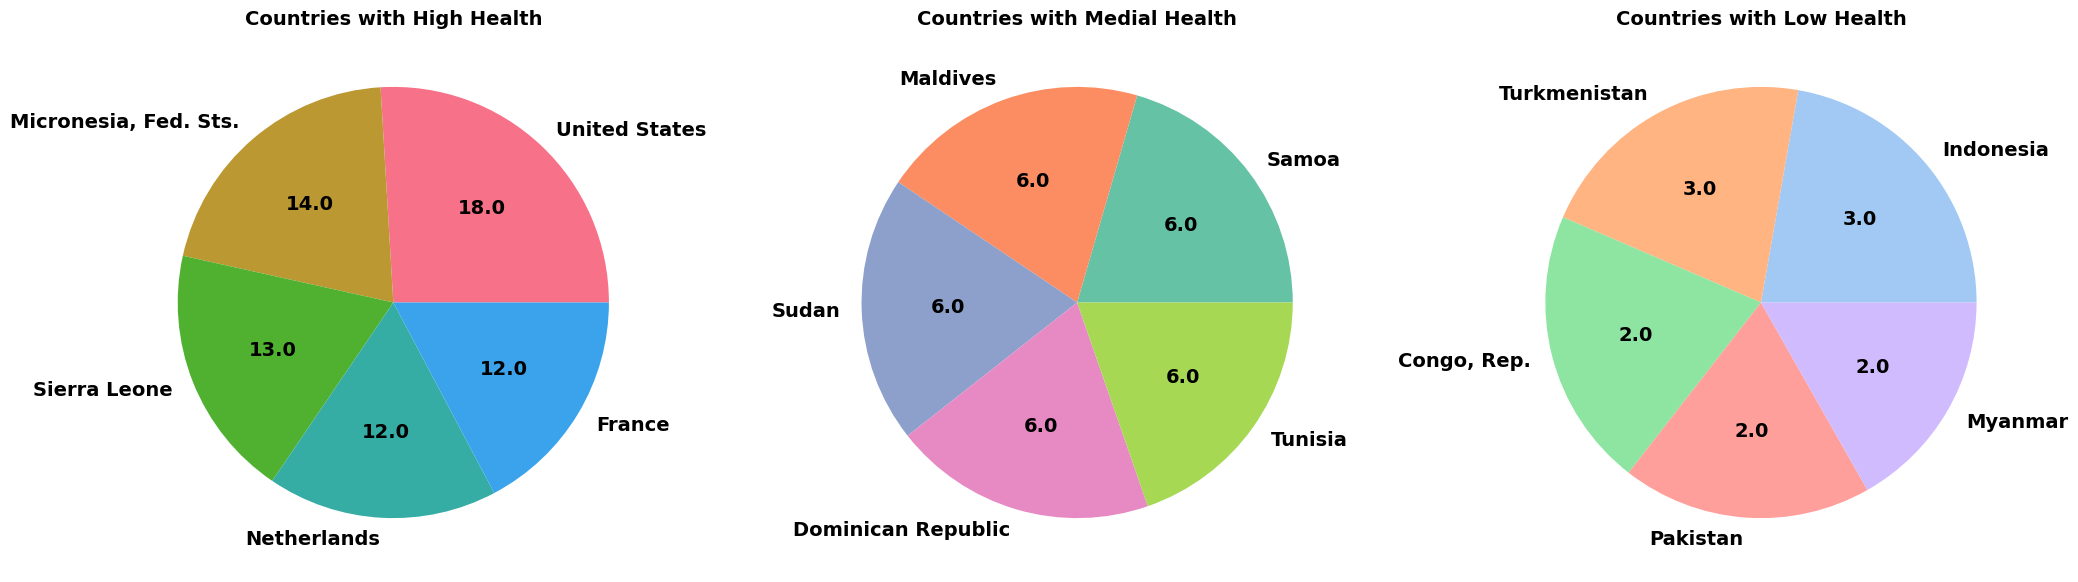

In [30]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['health'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'health').iloc[:5]
palette_color = sns.color_palette('husl') 
plt.title('Countries with High Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'health').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'health').iloc[161:166]
palette_color = sns.color_palette('pastel')
plt.title('Countries with Low Health', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['health'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show() 

The USA is the country that spends the most on health. <br>
Countries that pay less attention to health issues are located in the Asian continent.

#### d) Imports

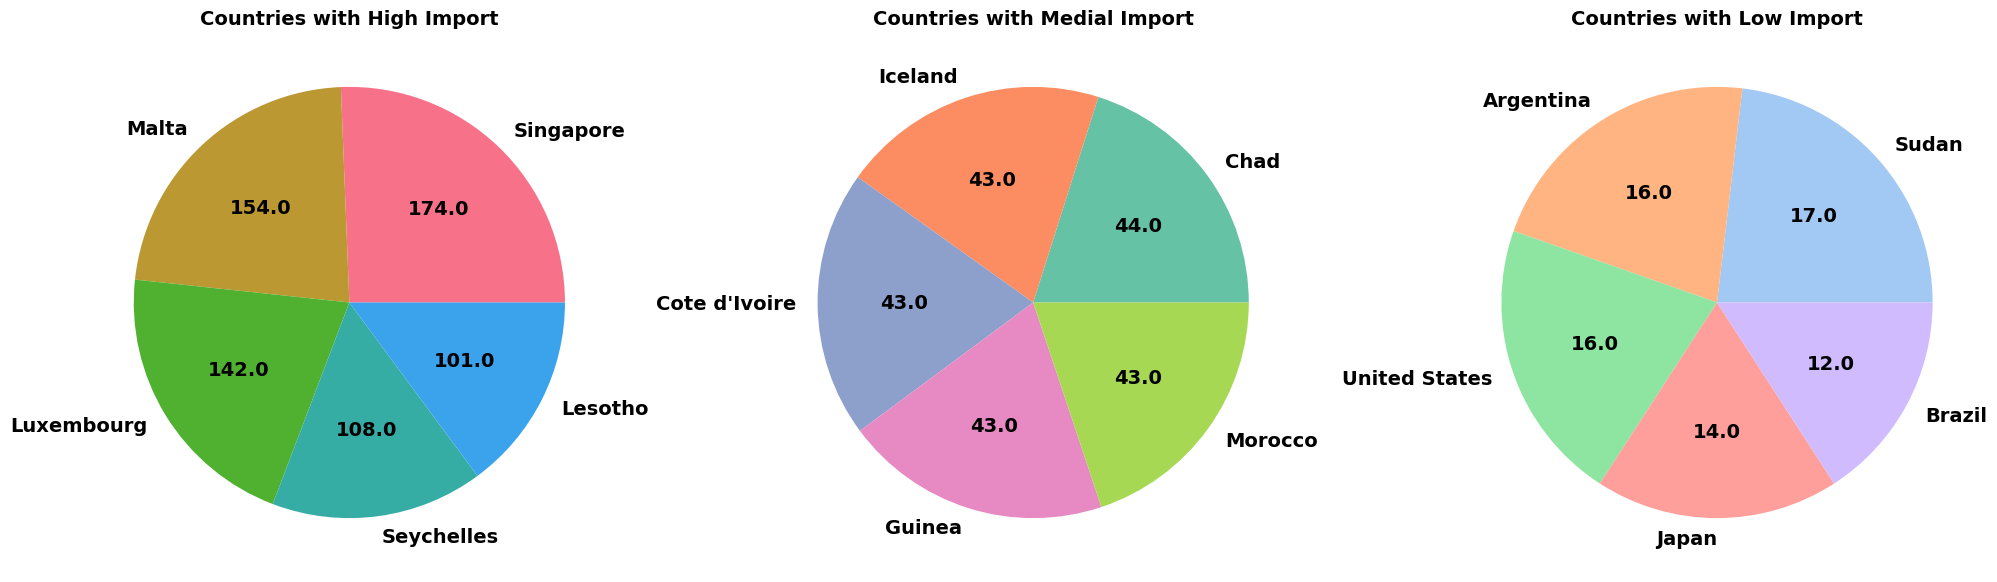

In [31]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['imports'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'imports').iloc[:5]
palette_color = sns.color_palette('husl') 
plt.title('Countries with High Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'imports').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'imports').iloc[161:166]
palette_color = sns.color_palette('pastel')
plt.title('Countries with Low Import', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['imports'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show() 

Singapore, Malta, Luxembourg, and Seychelles are on the list of countries that import the most. These countries also had the largest exports. <br>
Brazil is the least importer among the countries. Sudan, Argentina, USA, and Japan are among the countries that have low imports.

#### e) Income

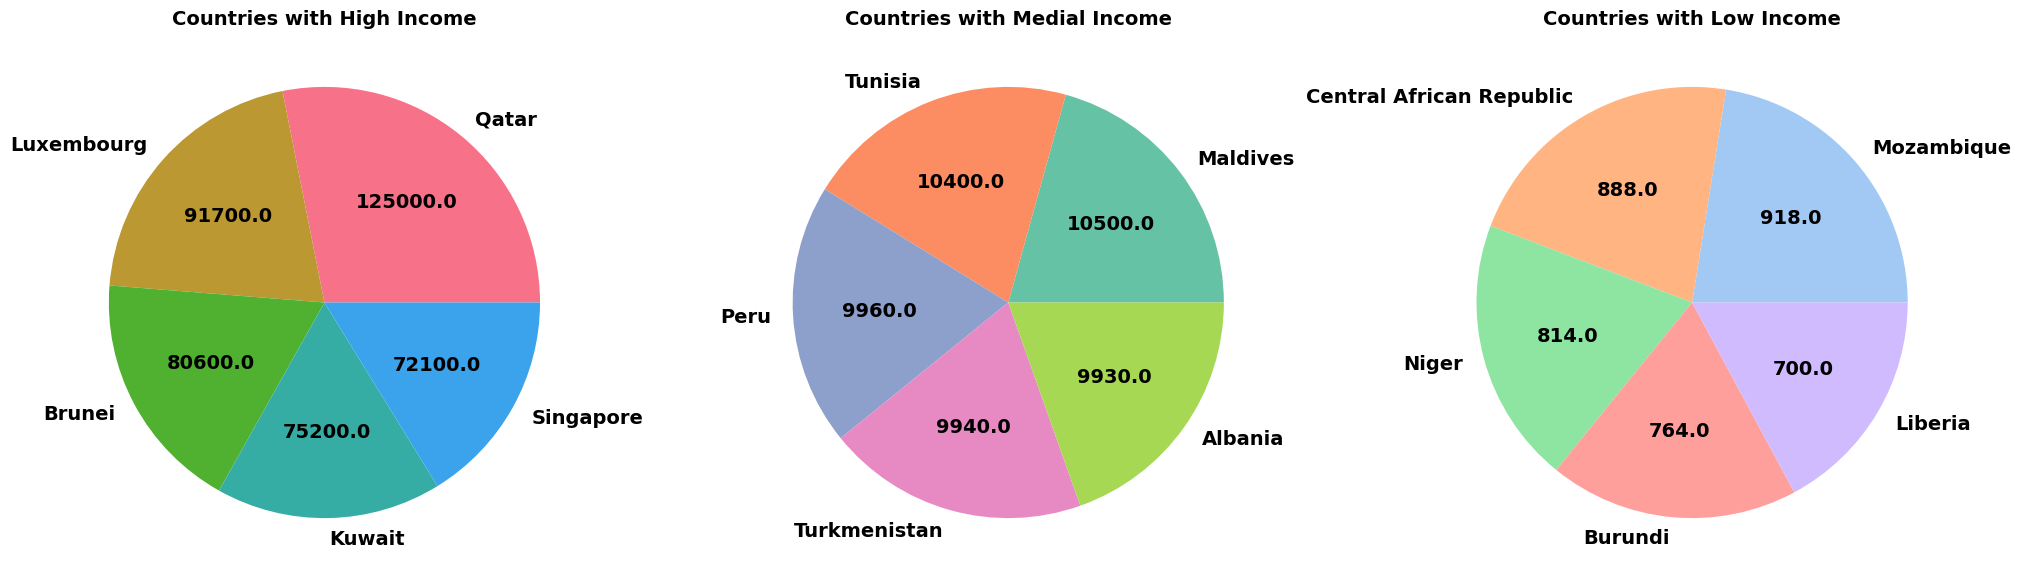

In [32]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['income'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'income').iloc[:5]
palette_color = sns.color_palette('husl') 
plt.title('Countries with High Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'income').iloc[81:86]
palette_color = sns.color_palette('Set2')
plt.title('Countries with Medial Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'income').iloc[161:166]
palette_color = sns.color_palette('pastel') 
plt.title('Countries with Low Income', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['income'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show() 

Qatar has the highest per capita income. The countries of Luxembourg and Singapore are again seen in the top five countries. In general, South Asian countries are unique in this matter. <br>
African countries are again in the last five lists and their annual income is less.

#### f) Inflamation

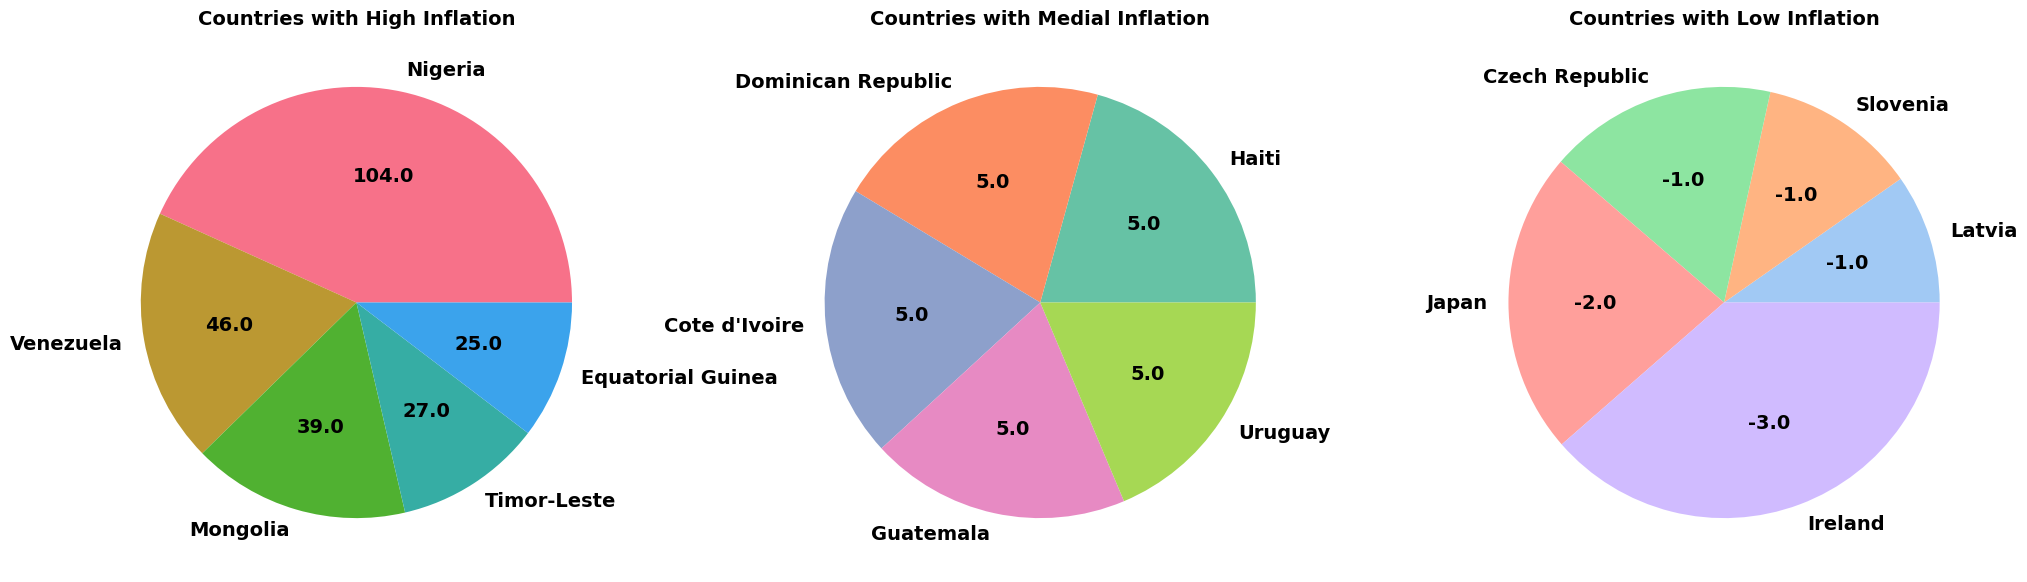

In [33]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['inflation'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'inflation').iloc[:5]
palette_color = sns.color_palette('husl')
plt.title('Countries with High Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['inflation'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'inflation').iloc[81:86]
palette_color = sns.color_palette('Set2')
plt.title('Countries with Medial Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['inflation'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'inflation').iloc[161:166]
palette_color = sns.color_palette('pastel') 
plt.title('Countries with Low Inflation', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = abs(data['inflation']), labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.show()

Nigeria has by far the highest inflation statistics. <br>
Some countries have negative inflation. <br>
Inflation reduces the actual value of money over time. Conversely, negative inflation increases the actual value of money (the national currency of a country or a regional economy). It means that a person can buy more goods over time with a fixed amount of money. In general, economists consider negative inflation as a problem in the modern economy. Because increasing the actual value of the debt may exacerbate the recession and lead to a spiral of negative inflation.

#### g) Life Expectancy

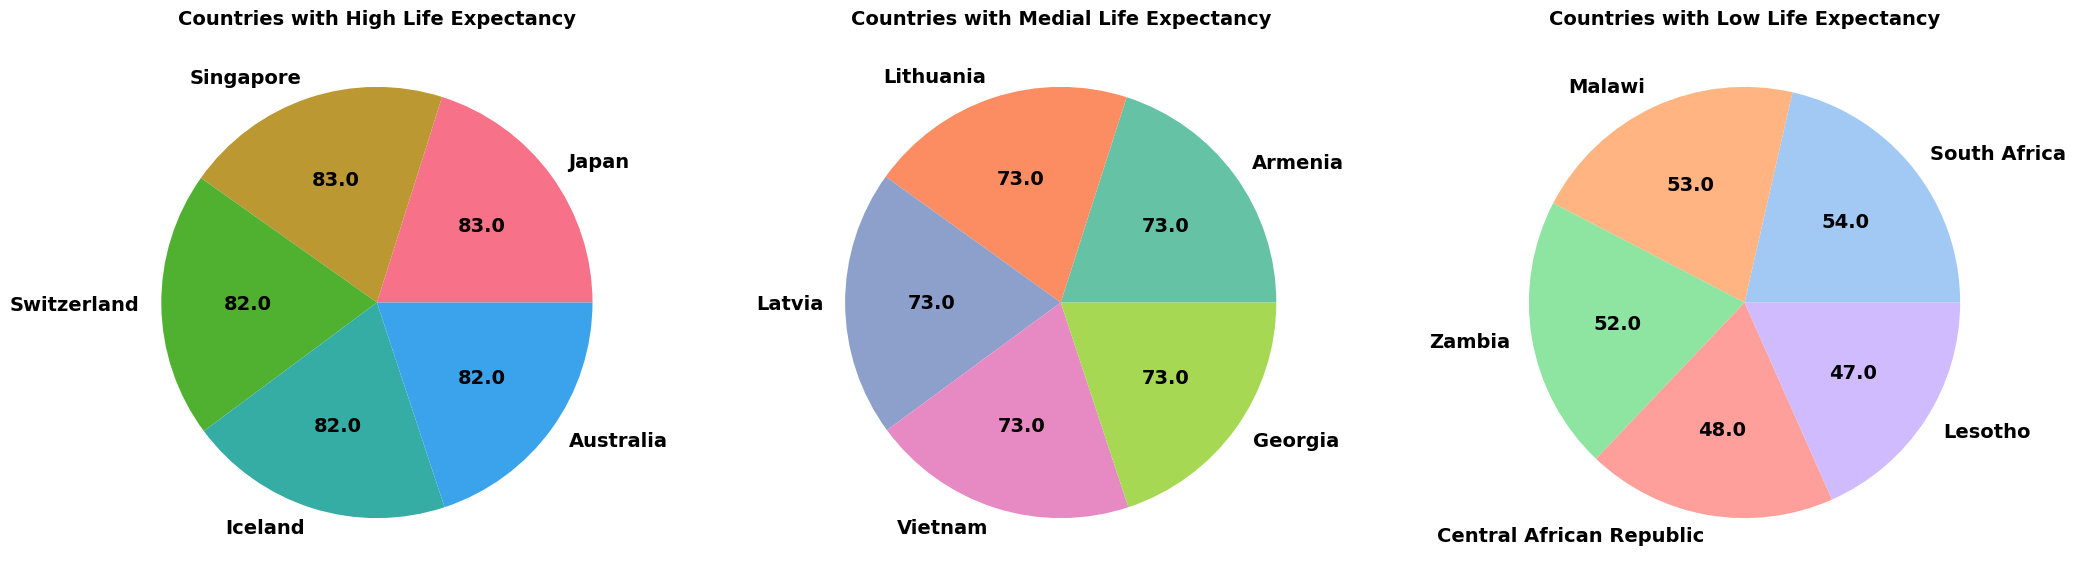

In [34]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['life_expec'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[:5]
palette_color = sns.color_palette('husl') 
plt.title('Countries with High Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'life_expec').iloc[161:166]
palette_color = sns.color_palette('pastel')
plt.title('Countries with Low Life Expectancy', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['life_expec'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show()

African countries have the lowest life expectancy and are again in the last five countries.

#### h) Total Fertility

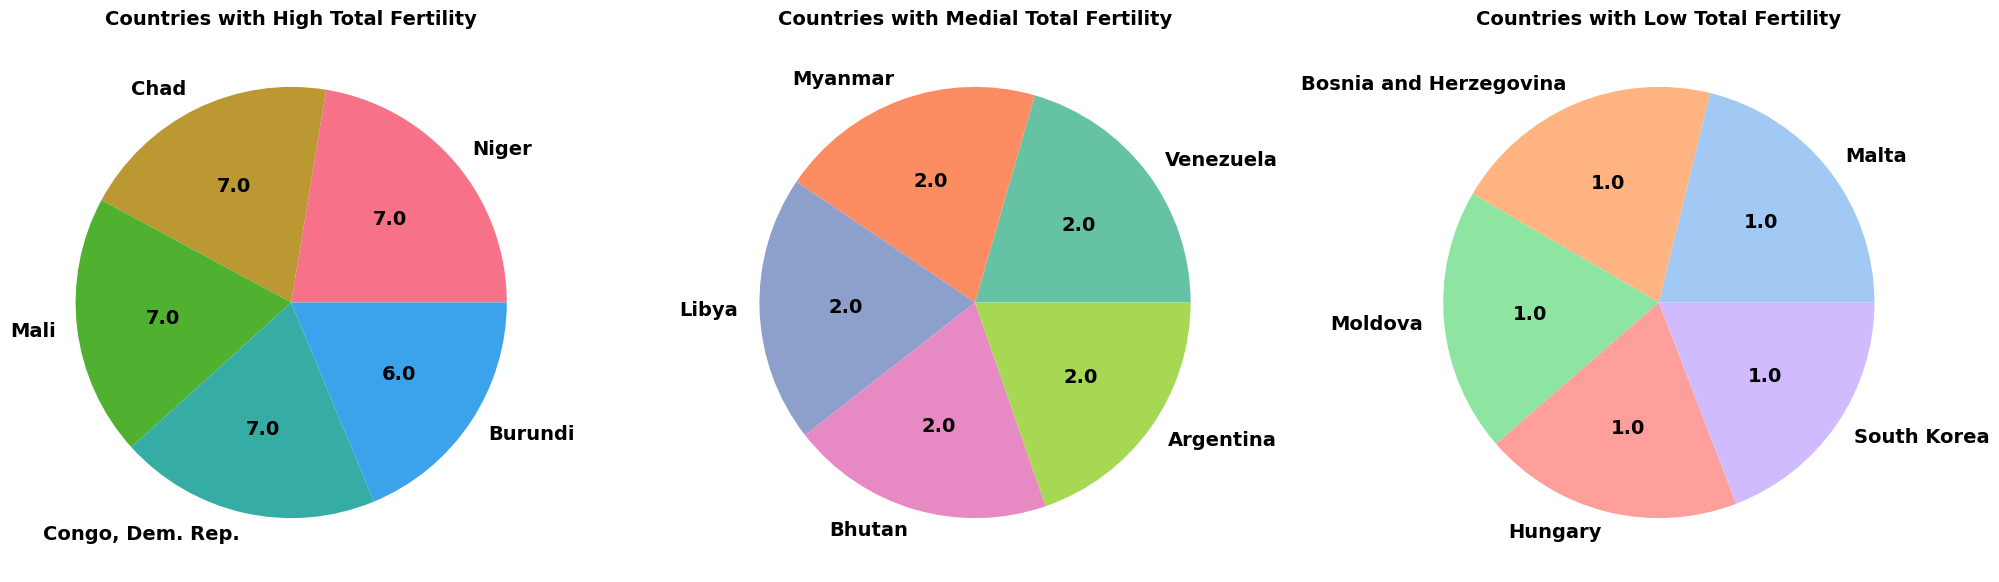

In [35]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['total_fer'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5]
palette_color = sns.color_palette('husl') 
plt.title('Countries with High Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166]
palette_color = sns.color_palette('pastel')
plt.title('Countries with Low Total Fertility', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['total_fer'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show()

African countries have the highest fertility rates (above 6). The average fertility is 2 and the lowest fertility is 1.

#### i) Gdpp

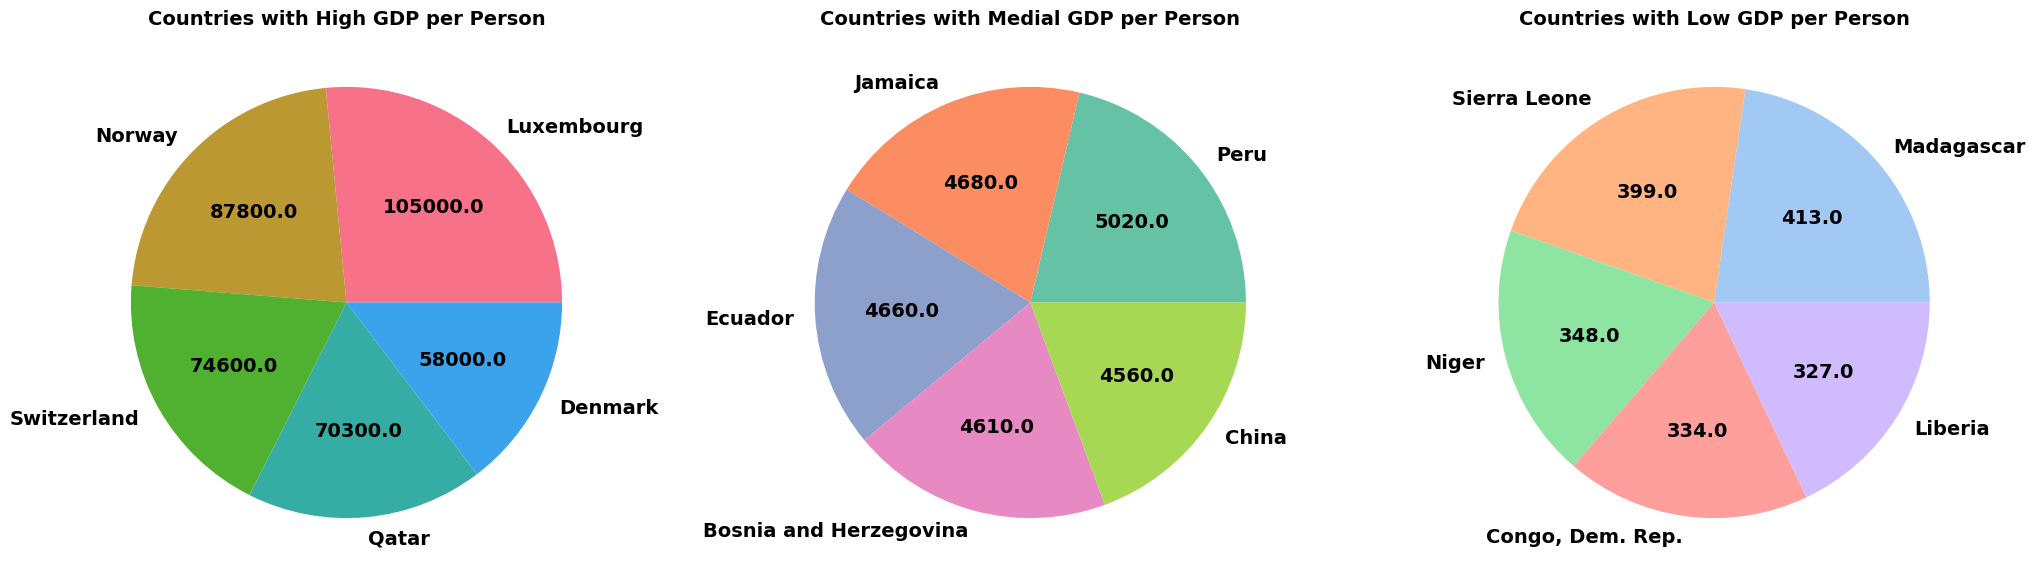

In [36]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

def absolute_value(val): # to show the actual values not percents
    a  = np.round(val/100.*data['gdpp'].sum(), 0)
    return a

plt.subplot(1,3,1)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5]
palette_color = sns.color_palette('husl')
plt.title('Countries with High GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"})

plt.subplot(1,3,2)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[81:86]
palette_color = sns.color_palette('Set2') 
plt.title('Countries with Medial GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.subplot(1,3,3)
data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166]
palette_color = sns.color_palette('pastel') 
plt.title('Countries with Low GDP per Person', fontsize = 14, fontweight="bold")
plt.pie(data = data,  x = data['gdpp'], labels=data['country'], colors=palette_color, autopct=absolute_value,
       textprops={'fontsize': 14, 'fontweight':"bold"}) 

plt.show()

European countries have the highest GDP. Luxembourg is again among the top five countries and has the highest GDP. On the other hand, again African countries are on the list of the last five countries.

### Visualize Noise and Outliers (BoxPlots)

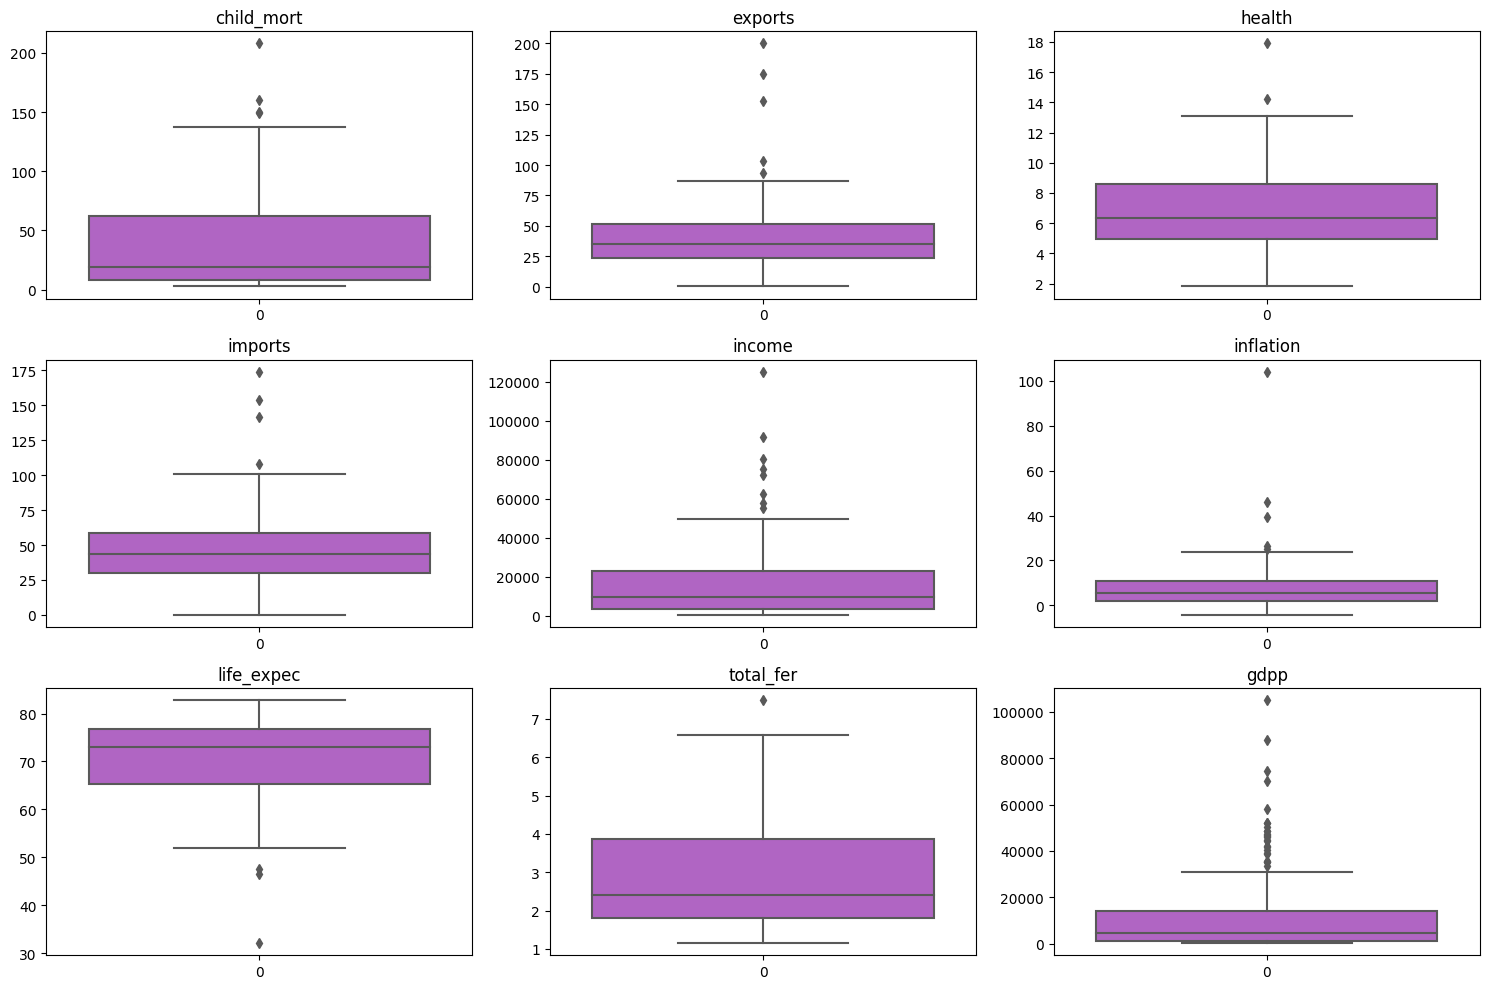

In [37]:
fig= plt.subplots(nrows=3 , ncols=3 , figsize=(15, 10))
for i in range (len(col)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(X[col[i]], color = '#BA55D3')
    plt.title(col[i])
    plt.tight_layout()

Data don't have outliers or noise. All numbers are possible in the real world!

## Dimensionality Reduction Using PCA

In [38]:
# Find the optimal number n_components
pca = PCA()
data_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

[0.82400771 0.10602075 0.02794208 0.02170418 0.00793512 0.00650681
 0.00248687 0.00194359 0.00145289]


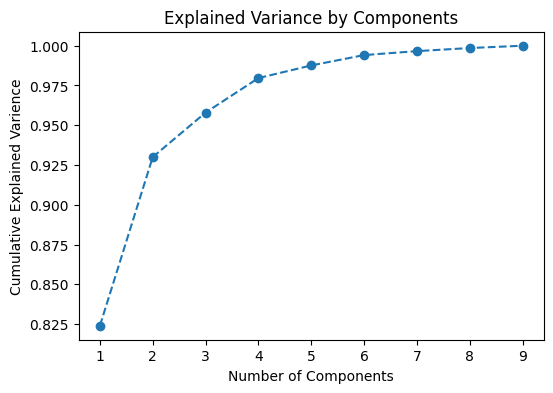

In [39]:
plt.figure(figsize = (6,4))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varience")
plt.show()

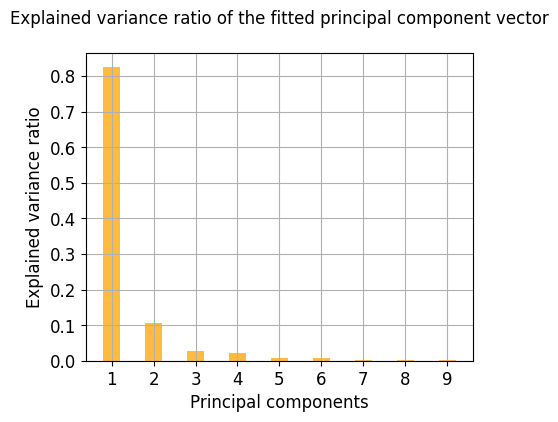

In [40]:
plt.figure(figsize=(5,4))
plt.bar([i+1 for i in range(len(pca.explained_variance_ratio_))],
        pca.explained_variance_ratio_,
        alpha=0.75, color='orange', width=0.4)
plt.grid(True)
plt.title("Explained variance ratio of the fitted principal component vector\n",fontsize=12)
plt.xlabel("Principal components",fontsize=12)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Explained variance ratio",fontsize=12)
plt.show()

In [41]:
# PCA Transforming
pca = PCA(n_components = 2)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)

## Model Implemention 

## KMeans

<b> NB: To obtain the best model in KMeans from our comparative study, set the Feature Scaling as Combination of StandardScaler & MinMaxScaler with k=3 </b>

#### To find the optimal number of clusters

##### - For Scaled Data

Inertia (Clustering Score): 
 [204.96076254746228, 89.65768562688183, 64.95471590671238, 54.10624873676375, 46.10066120475203, 40.48007386309969, 37.16017209473471, 33.75214649425136, 31.511005093954545]


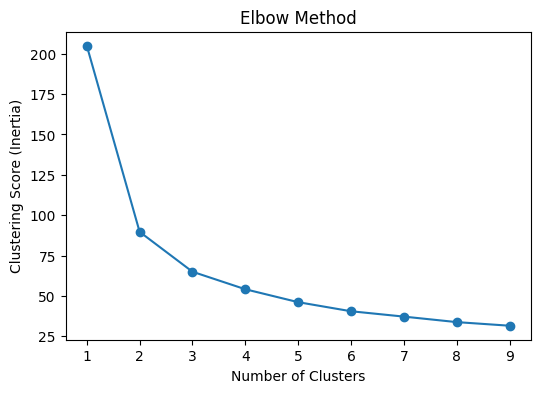

In [42]:
# Elbow Method

individual_clustering_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X_scaled)
    individual_clustering_score.append(kmeans.inertia_) 
    
print('Inertia (Clustering Score): \n', individual_clustering_score)
plt.figure(figsize=(6,4))
plt.plot(range(1, 10), individual_clustering_score, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score (Inertia)')
plt.show()  

We find that optimal number of clusters is 3 from elbow method.

k=2, Silhouette score=0.48
k=3, Silhouette score=0.36
k=4, Silhouette score=0.30
k=5, Silhouette score=0.31
k=6, Silhouette score=0.30
k=7, Silhouette score=0.31
k=8, Silhouette score=0.30
k=9, Silhouette score=0.31


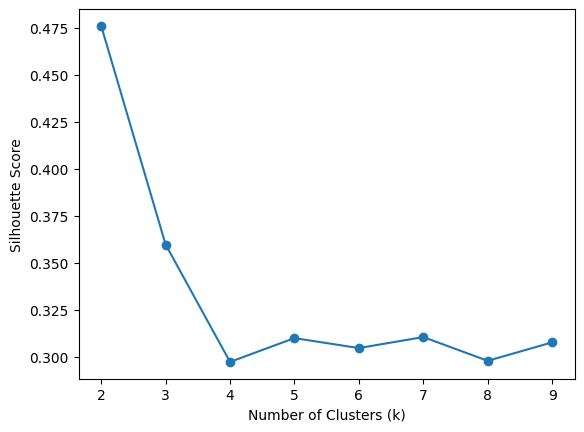

In [43]:
s_scores = []
for k in range(2, 10):
    kmean = KMeans(n_clusters=k)
    clusters = kmean.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, clusters)
    s_scores.append(score)
    print(f'k={k}, Silhouette score={score:.2f}')

plt.plot(range(2, 10), s_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

##### - For PCA Data

Inertia (Clustering Score): 
 [190.61934204717699, 75.37379548613316, 50.912645070123766, 40.07654479175939, 32.992339367622606, 27.509206100780688, 23.34964235953528, 19.926894298326562, 17.41253155133876]


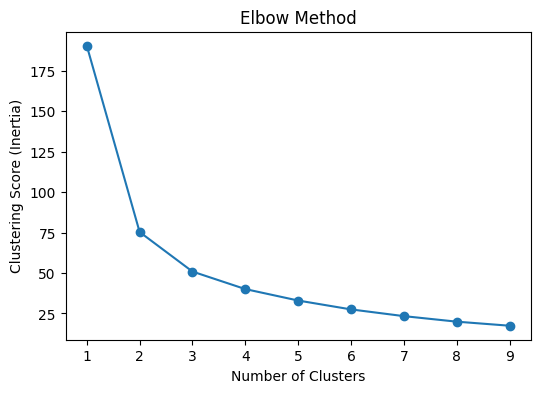

In [44]:
# Elbow Method

individual_clustering_score = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(data_pca)
    individual_clustering_score.append(kmeans.inertia_) 
    
print('Inertia (Clustering Score): \n', individual_clustering_score)
plt.figure(figsize=(6,4))
plt.plot(range(1, 10), individual_clustering_score, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score (Inertia)')
plt.show()  

We find that optimal number of clusters is 3 from elbow method.

k=2, Silhouette score=0.52
k=3, Silhouette score=0.42
k=4, Silhouette score=0.37
k=5, Silhouette score=0.37
k=6, Silhouette score=0.38
k=7, Silhouette score=0.37
k=8, Silhouette score=0.39
k=9, Silhouette score=0.41


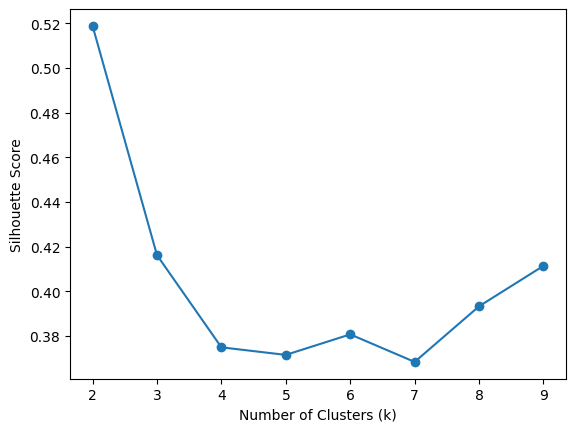

In [45]:
s_scores = []
for k in range(2, 10):
    kmean = KMeans(n_clusters=k)
    clusters = kmean.fit_predict(data_pca)
    score = silhouette_score(data_pca, clusters)
    s_scores.append(score)
    print(f'k={k}, Silhouette score={score:.2f}')

plt.plot(range(2, 10), s_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

#### Training KMeans on scaled data

In [46]:
# Fit the model and predict
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_scaled)
label = kmeans.labels_ 

In [47]:
# Performance Scores

In [48]:
silhouette_score(X_scaled,label) 

0.3598130074032263

In [49]:
calinski_harabasz_score(X_scaled,label)

176.74614790140436

In [50]:
# Cluster Centres
kmeans.cluster_centers_

array([[ 0.09900859,  0.182982  ,  1.53575727,  0.27403714,  0.21473029,
         0.06886581,  0.85015839,  0.18091005,  0.27810881],
       [ 0.23032722,  0.20564464, -0.85340505,  0.24826837,  0.10821099,
         0.14383703,  0.70845012,  0.35360286,  0.06391317],
       [ 0.14188463,  0.2170043 ,  0.24446196,  0.29389627,  0.11878798,
         0.09142679,  0.7719173 ,  0.25027195,  0.10795589]])

In [51]:
# Predicted Data
data_km=df.copy(deep=True)
data_km['clusters'] = label 
data_km.head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,1


In [52]:
# Mapping the 3 clusters directly

data_km['Segment'] = data_km['clusters'].map({0: 'First', 1: 'Second', 2: 'Third'})
data_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,Segment
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,Third
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,Third
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,Second
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,Second
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,Third


Countries which present in clusters=1 is the one that needs money from HELP International NGO because the model is predicated to have less income and health report, and child_mort value seems to be higher than other 2 clusters

In [53]:
# Countries Need Help
country_need=list(data_km[data_km['clusters']==1].country)    
country_need

['Algeria',
 'Angola',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guinea',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Lao',
 'Libya',
 'Madagascar',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Seychelles',
 'Singapore',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Tajikistan',
 'Tanzania',
 'Thailand',
 'Tonga',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela',
 'Yemen',
 'Zambia']

In [54]:
# World Map Representation
data_km['clusters'].loc[data_km['clusters'] == 0] = 'No Help Needed'
data_km['clusters'].loc[data_km['clusters'] == 2] = 'Might Need Help'
data_km['clusters'].loc[data_km['clusters'] == 1] = 'Help Needed'

fig = px.choropleth(data_km[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_km['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

## KMeans on PCA Transformed Data

In [55]:
# Implementing PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)
data_pca = pca.transform(X_scaled)

In [56]:
# Train & Fit KMeans
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca.fit(data_pca)
kmeans_labels_pca = kmeans_pca.predict(data_pca)

In [57]:
# Performance scores

In [58]:
silhouette_score(data_pca,kmeans_labels_pca)

0.41232655332809076

In [59]:
calinski_harabasz_score(data_pca,kmeans_labels_pca)

224.53780042242755

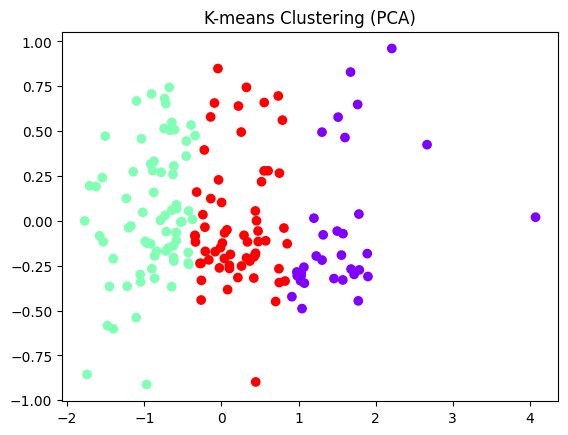

In [60]:
# Visualize the Clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels_pca, cmap='rainbow')
plt.title('K-means Clustering (PCA)')
plt.show()

In [61]:
# Predicted Data
data_pca_km = pd.concat([df.reset_index(drop = True), pd.DataFrame(data_pca)], axis = 1)
data_pca_km.columns.values[-2:] = ['Component 1', 'Component 2'] 

data_pca_km['clusters'] = kmeans_pca.labels_
data_pca_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Component 1,Component 2,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.220482,0.640048,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.080903,-0.172000,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.961283,-0.125199,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.505914,0.472144,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.264724,-0.237308,2


Countries which present in clusters=1 is the one that needs money from HELP International NGO because the model is predicated to have less income and health report, and child_mort value seems to be higher than other 2 clusters

In [62]:
# Mapping the 3 clusters 
data_pca_km['Segment'] = data_pca_km['clusters'].map({0: 'First', 1: 'Second', 2: 'Third'})
data_pca_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Component 1,Component 2,clusters,Segment
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.220482,0.640048,2,Third
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,-0.080903,-0.172000,2,Third
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.961283,-0.125199,1,Second
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-1.505914,0.472144,1,Second
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,-0.264724,-0.237308,2,Third


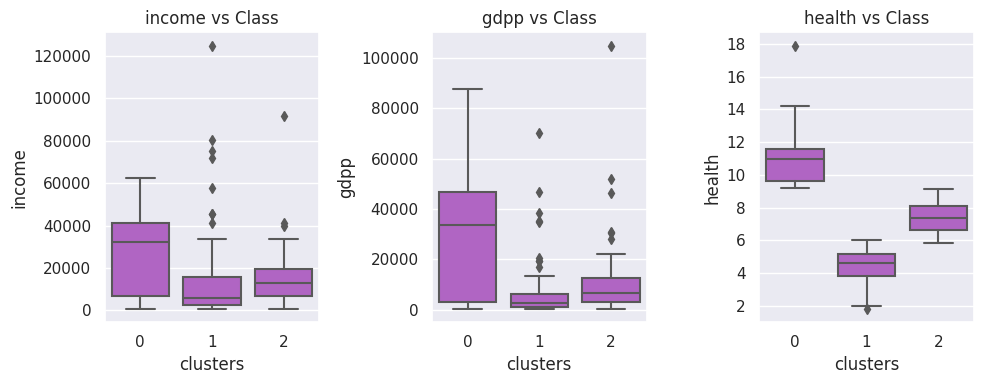

In [63]:
# BoxPlot Visualization
sns.set()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

plt.subplot(1,3,1)
sns.boxplot(x = 'clusters', y = 'income', data  = data_pca_km, color = '#BA55D3');
plt.title('income vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'clusters', y = 'gdpp', data  = data_pca_km, color = '#BA55D3');
plt.title('gdpp vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'clusters', y = 'health', data  = data_pca_km, color = '#BA55D3');
plt.title('health vs Class')

plt.tight_layout()
plt.show()

In [64]:
# Countries Need Help
country_need=list(data_pca_km[data_pca_km['clusters']==1].country)    
country_need

['Algeria',
 'Angola',
 'Armenia',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Lao',
 'Libya',
 'Madagascar',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Peru',
 'Philippines',
 'Qatar',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Seychelles',
 'Singapore',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Thailand',
 'Tonga',
 'Turkmenistan',
 'United Arab Emirates',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela',
 'Yemen',
 'Zambia']

In [65]:
# World Map Representation
data_pca_km['clusters'].loc[data_pca_km['clusters'] == 0] = 'No Help Needed'
data_pca_km['clusters'].loc[data_pca_km['clusters'] == 2] = 'Might Need Help'
data_pca_km['clusters'].loc[data_pca_km['clusters'] == 1] = 'Help Needed'

fig = px.choropleth(data_pca_km[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_pca_km['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

### DBSCAN

<b> NB: To obtain the best model in DBSCAN from our comparative study, set the Feature Scaling as Combination of StandardScaler & MinMaxScaler on PCA Data with k=3 <b>

#### Training DBSCAN on Scaled Data

In [66]:
# Finding optimal parameters

radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances: 
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(X_scaled)
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(X_scaled, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)
    
dbscan_perf = pd.DataFrame(dbscan_perf)

In [67]:
np.sort(dbscan_perf['N_Cluster'].unique())

array([1, 2, 3, 4, 5, 6])

In [68]:
print("Greatest Silhouette Coeffiecient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coeffiecient per Number of Clusters:


,Silhouette_Coefficient
N_Cluster,
2,0.644741
3,0.275422
4,0.137304
5,-0.094697
6,-0.059722


In [69]:
# Best parameters for k=2
dbscan_perf[dbscan_perf['N_Cluster'] == 2].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
13215,manhattan,2.75,60,2,0.644741


In [70]:
# Train & Fit the model on the above obtained parameters
dbs = DBSCAN(eps=2.75, min_samples=60, metric='manhattan')
dbs.fit(X_scaled)
cluster = dbs.labels_
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0]), array([  1, 166]))

In [71]:
# Data Predicted
data_dbscan=df.copy(deep=True) 
data_dbscan['clusters'] = cluster
data_dbscan.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [72]:
# Best parameters for k=3
dbscan_perf[dbscan_perf['N_Cluster'] == 3].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
10980,manhattan,0.8,9,3,0.275422


In [73]:
# Train & Fit the model on the above obtained parameters
dbs = DBSCAN(eps=0.8, min_samples=9, metric='manhattan')
dbs.fit(X_scaled)
cluster = dbs.labels_
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 39, 105,  23]))

In [74]:
# Data Predicted
data_dbscan=df.copy(deep=True) 
data_dbscan['clusters'] = cluster
data_dbscan.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,-1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,-1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [75]:
# Country Need Help
country_need=list(data_dbscan[data_dbscan['clusters']==0].country) 
country_need

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Nepal',
 'Niger',
 'Panama',
 'Paraguay',
 'Peru

In [76]:
# World Map Representation
data_dbscan['clusters'].loc[data_dbscan['clusters'] == 1] = 'No Help Needed'
data_dbscan['clusters'].loc[data_dbscan['clusters'] == -1] = 'Might Need Help'
data_dbscan['clusters'].loc[data_dbscan['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_dbscan[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_dbscan['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

## DBSCAN on PCA Transformed Data

In [77]:
# Finding optimal parameters

radius = np.arange(0.5, 10, 0.05)
min_obs = range(5,61)
distances = ['euclidean', 'manhattan']
dbscan_perf = {'Distance':[], 'Radius':[], 'Min_Points':[], 'N_Cluster':[], 'Silhouette_Coefficient':[]}

for d in distances: 
    for r in radius:
        for m in min_obs:
            dbs = DBSCAN(eps=r, min_samples=m, metric=d)
            dbs.fit(data_pca)
            dbscan_perf['Distance'].append(d)
            dbscan_perf['Radius'].append(r)
            dbscan_perf['Min_Points'].append(m)
            dbscan_perf['N_Cluster'].append(len(np.unique(dbs.labels_)))
            try:
                dbscan_perf['Silhouette_Coefficient'].append(silhouette_score(X_scaled, dbs.labels_))
            except:
                dbscan_perf['Silhouette_Coefficient'].append(np.nan)
    
dbscan_perf = pd.DataFrame(dbscan_perf)

In [78]:
np.sort(dbscan_perf['N_Cluster'].unique())

array([1, 2, 3])

In [79]:
print("Greatest Silhouette Coeffiecient per Number of Clusters:")
dbscan_perf.groupby(['N_Cluster'], as_index=True)[['Silhouette_Coefficient']].max().loc[2:]

Greatest Silhouette Coeffiecient per Number of Clusters:


,Silhouette_Coefficient
N_Cluster,
2,0.644741
3,0.326849


In [80]:
# Best parameters for k=2
dbscan_perf[dbscan_perf['N_Cluster'] == 2].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
12711,manhattan,2.3,60,2,0.644741


In [81]:
# Train & Fit the model on the above obtained parameters
dbs = DBSCAN(eps=2.3, min_samples=60, metric='manhattan')
dbs.fit(data_pca)
cluster = dbs.labels_
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0]), array([  1, 166]))

In [82]:
# Data Predicted
data_dbscan=df.copy(deep=True) 
data_dbscan['clusters'] = cluster
data_dbscan.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [83]:
# Best parameters for k=3
dbscan_perf[dbscan_perf['N_Cluster'] == 3].sort_values('Silhouette_Coefficient', ascending=False).head(1)

,Distance,Radius,Min_Points,N_Cluster,Silhouette_Coefficient
19,euclidean,0.5,24,3,0.326849


In [84]:
# Train & Fit the model on the above obtained parameters
dbs = DBSCAN(eps=0.5, min_samples=24, metric='euclidean')
dbs.fit(data_pca)
cluster = dbs.labels_
np.unique(dbs.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 16, 139,  12]))

In [85]:
# Data Predicted
data_dbscan=df.copy(deep=True) 
data_dbscan['clusters'] = cluster
data_dbscan.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


Countries which present in clusters=0 is the one that needs money from HELP International NGO because the model is predicated to have less income and health report, and child_mort value seems to be higher than other 2 clusters

In [86]:
# Country Need Help
country_need=list(data_dbscan[data_dbscan['clusters']==0].country) 
country_need

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, F

In [87]:
# World Map Representation
data_dbscan['clusters'].loc[data_dbscan['clusters'] == 1] = 'No Help Needed'
data_dbscan['clusters'].loc[data_dbscan['clusters'] == -1] = 'Might Need Help'
data_dbscan['clusters'].loc[data_dbscan['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_dbscan[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_dbscan['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

## Hierarchical Clustering

#### Training Agglomerative Clustering on scaled data

##### Dendograms

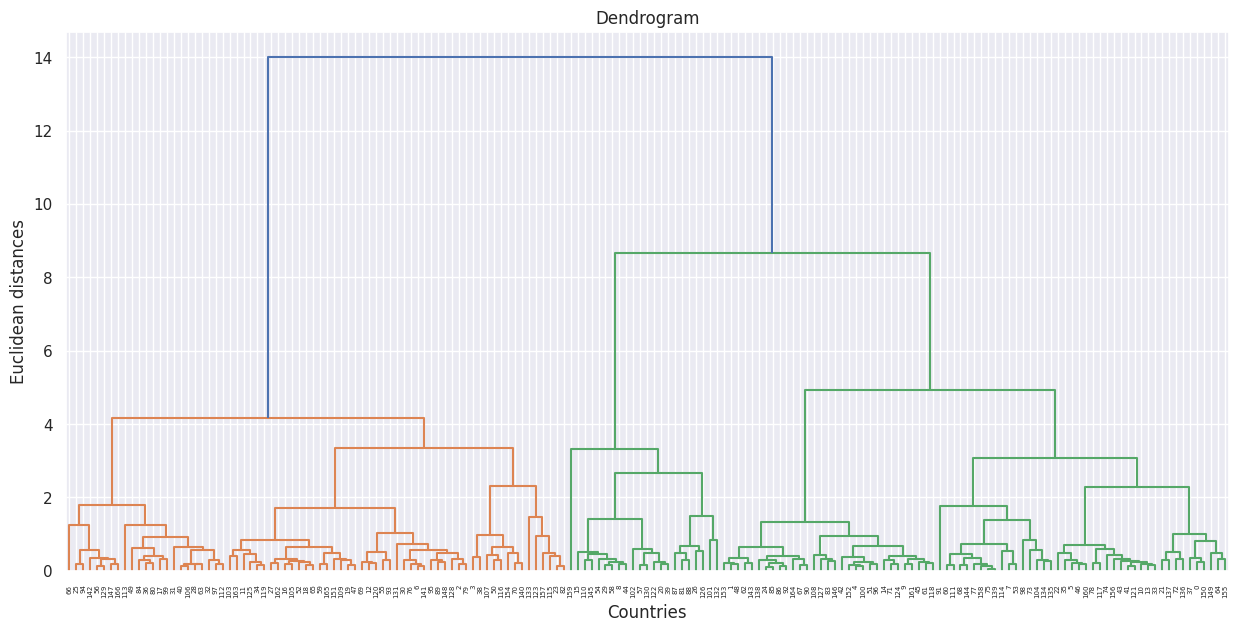

In [88]:
# For linkage='ward'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

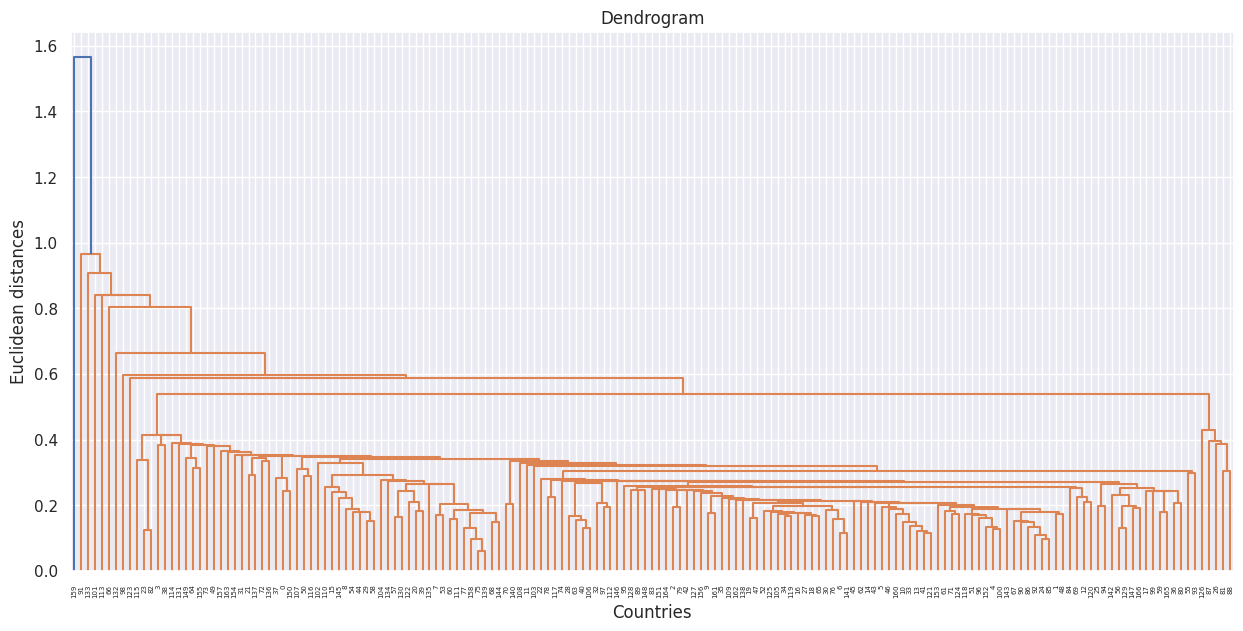

In [89]:
# For linkage='single'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

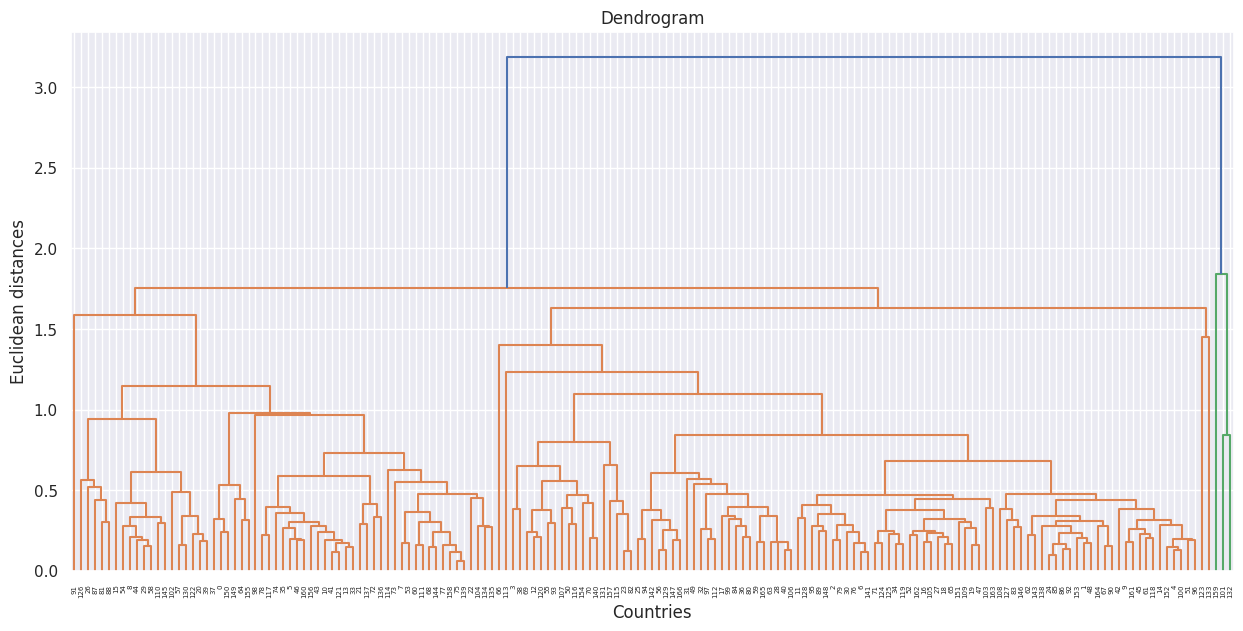

In [90]:
# For linkage='average'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

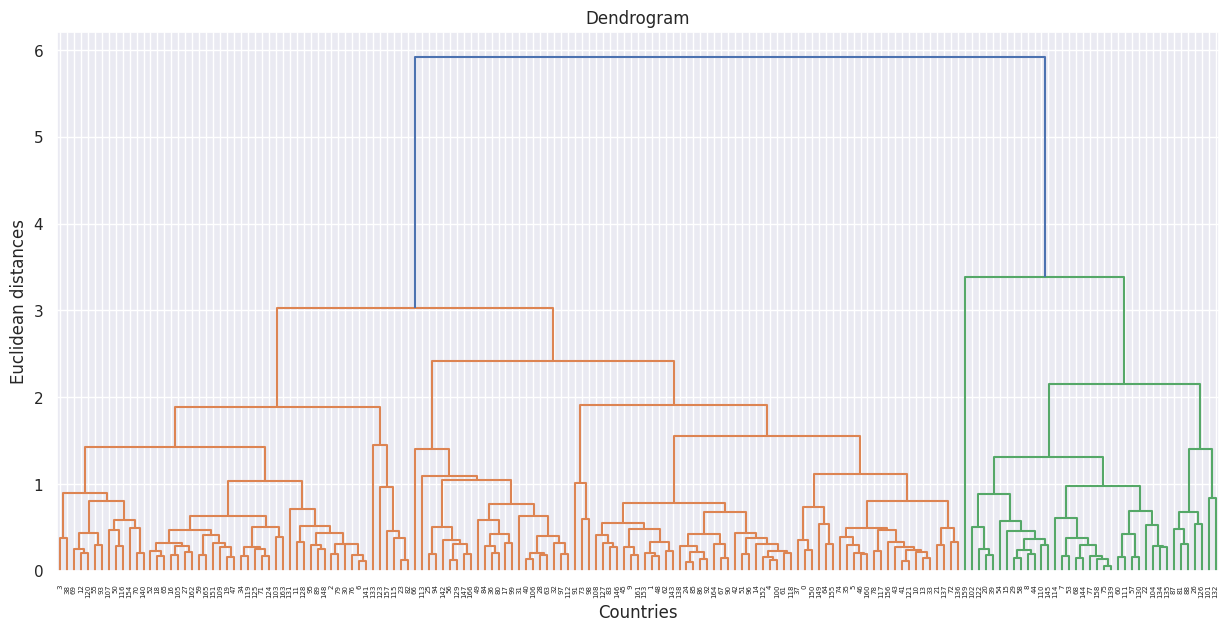

In [91]:
# For linkage='complete'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

##### Training HC Model with linkage='ward'

In [92]:
# Train & Fit the Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hc.fit_predict(X_scaled)  
cluster = hc.labels_  

In [93]:
# Performance Scores

In [94]:
silhouette_score(X_scaled,cluster)

0.3489313617505055

In [95]:
calinski_harabasz_score(X_scaled,cluster)

159.27730800996872

In [96]:
# Cluster Predict
data_w=df.copy(deep=True) 
data_w['clusters'] = cluster
data_w.head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,1
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [97]:
# Country need Help
country_need=list(data_w[data_w['clusters']==1].country) 
country_need 

['Algeria',
 'Angola',
 'Armenia',
 'Bahrain',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guyana',
 'Haiti',
 'India',
 'Indonesia',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Lao',
 'Libya',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Peru',
 'Philippines',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Seychelles',
 'Singapore',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Tanzania',
 'Thailand',
 'Tonga',
 'Turkmenistan',
 'United Arab Emirates',
 'Vanuatu',
 'Venezuela',
 'Yemen',
 'Zambia']

##### Training HC Model with linkage='single'

In [98]:
# Fit & Train Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
hc.fit_predict(X_scaled)
cluster = hc.labels_

In [99]:
# Performance Scores

In [100]:
silhouette_score(X_scaled,cluster) 

0.2470317521632707

In [101]:
calinski_harabasz_score(X_scaled,cluster)

8.353241253882725

In [102]:
# Cluster Predict
data_s=df.copy(deep=True) 
data_s['clusters'] = cluster
data_s.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [103]:
# Country Need Help
country_need=list(data_s[data_s['clusters']==0].country) 
country_need

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Ita

##### Training HC Model with linkage='average'

In [104]:
# Train & Fit the Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
hc.fit_predict(X_scaled) 
cluster = hc.labels_ 

In [105]:
# Performance Scores

In [106]:
silhouette_score(X_scaled,cluster)

0.45448965376418426

In [107]:
calinski_harabasz_score(X_scaled,cluster)

14.111213317745474

In [108]:
# Cluster Predict
data_a=df.copy(deep=True) 
data_a['clusters'] = cluster
data_a.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [109]:
# Country Need Help
country_need=list(data_a[data_a['clusters']==1].country) 
country_need

['Micronesia, Fed. Sts.', 'Sierra Leone']

##### Training HC Model with linkage='complete'

In [110]:
# Train & Fit the model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
hc.fit_predict(X_scaled) 
cluster = hc.labels_ 

In [111]:
# Performance Scores

In [112]:
silhouette_score(X_scaled,cluster)

0.4566288035042695

In [113]:
calinski_harabasz_score(X_scaled,cluster)

94.63544214246579

In [114]:
# Cluster Predict
data_c=df.copy(deep=True) 
data_c['clusters'] = cluster
data_c.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [115]:
# Country Need Help
country_need=list(data_c[data_c['clusters']==0].country) 
country_need

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malay

In [116]:
# World Map Representation
data_c['clusters'].loc[data_c['clusters'] == 2] = 'No Help Needed'
data_c['clusters'].loc[data_c['clusters'] == 1] = 'Might Need Help'
data_c['clusters'].loc[data_c['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_c[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_w['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)

## Hierarchical Clustering on PCA Transformed Data

##### Dendograms

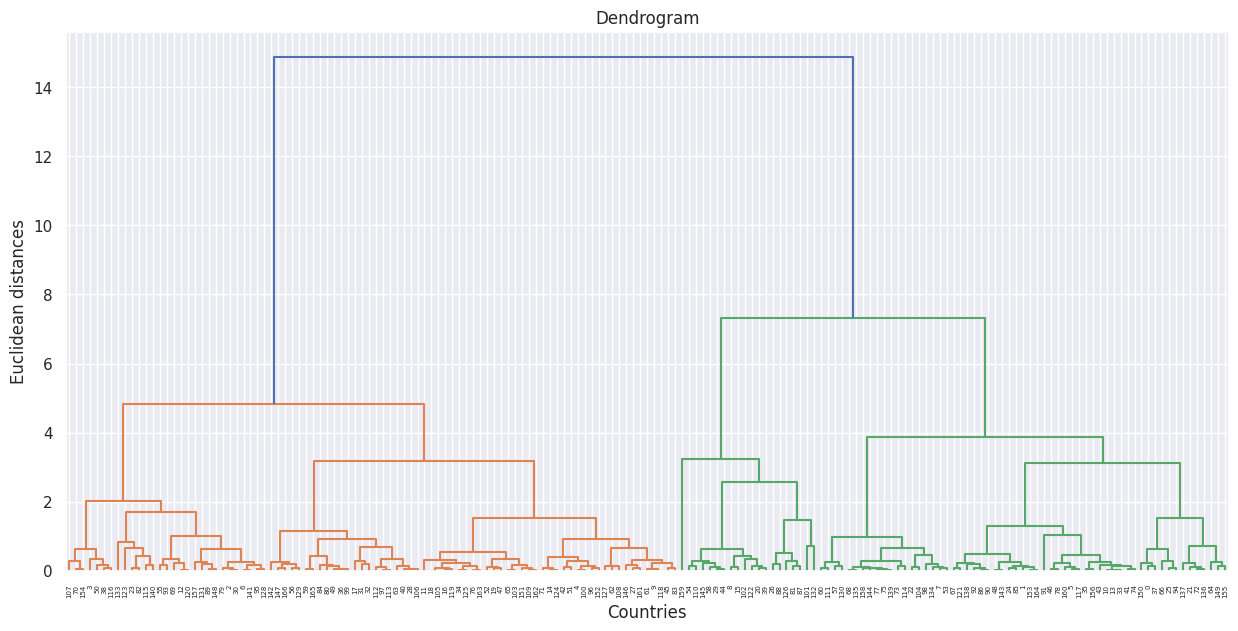

In [117]:
# For linkage='ward'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

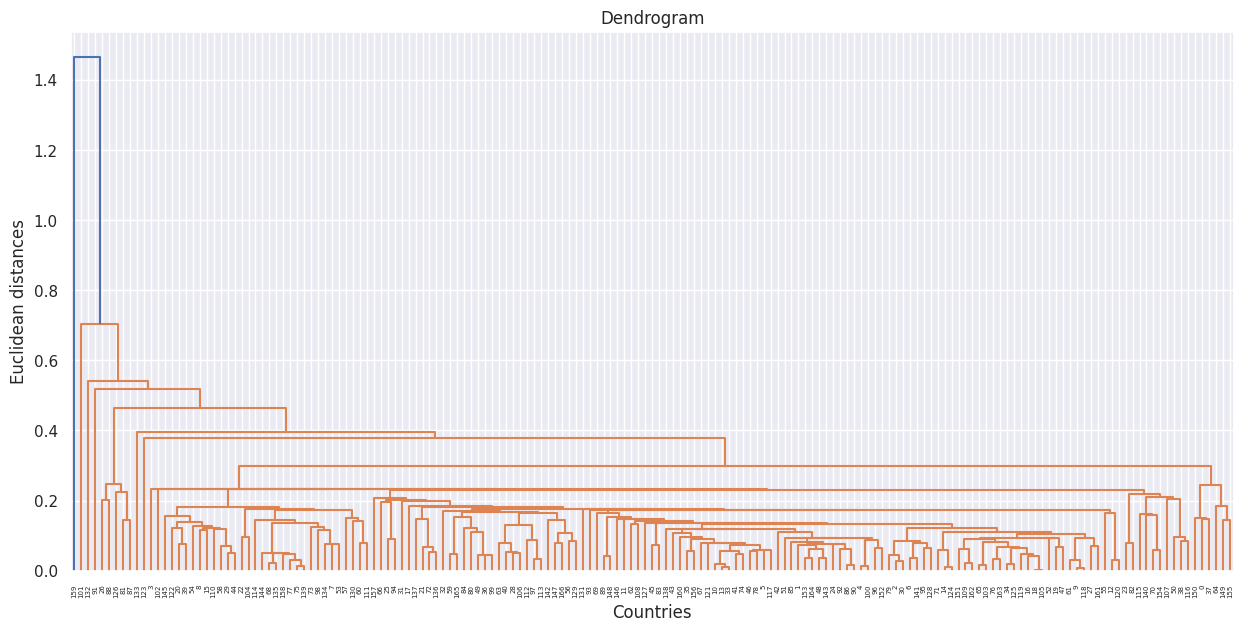

In [118]:
# For linkage='single'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

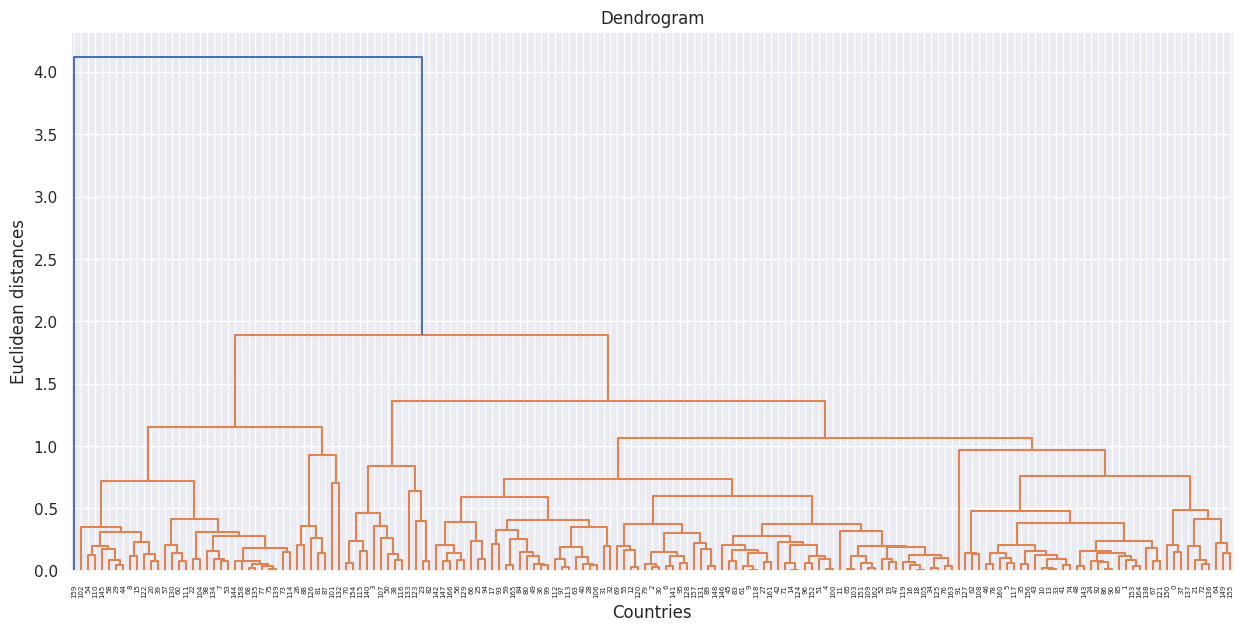

In [119]:
# For linkage='average'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

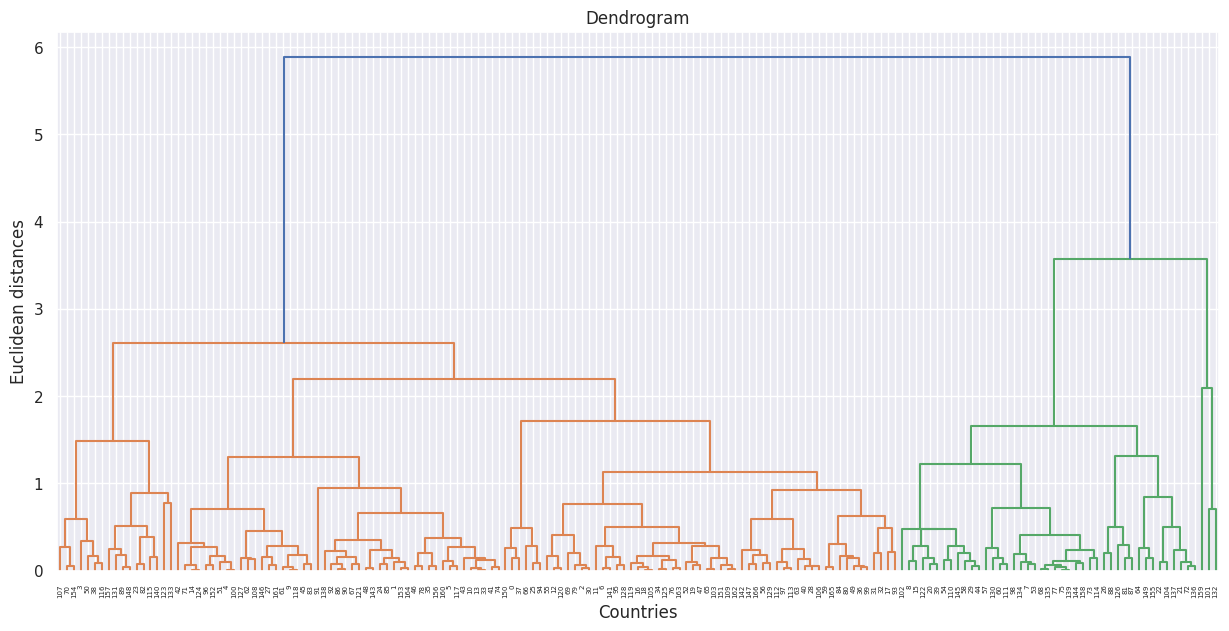

In [120]:
# For linkage='complete'
plt.figure(figsize=(15, 7))
dendrogram = sch.dendrogram(sch.linkage(data_pca, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances') 
plt.show()

##### Training HC Model with linkage='ward'

In [121]:
# Train & Fit the Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hc.fit_predict(data_pca)  
cluster = hc.labels_  

In [122]:
# Performance Scores

In [123]:
silhouette_score(data_pca,cluster)

0.4366193480871073

In [124]:
calinski_harabasz_score(data_pca,cluster)

210.49810525815224

In [125]:
# Cluster Predict
data_w=df.copy(deep=True) 
data_w['clusters'] = cluster
data_w.head(10) 

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [126]:
# Country need Help
country_need=list(data_w[data_w['clusters']==0].country) 
country_need 

['Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Armenia',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'China',
 'Comoros',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Cyprus',
 'Dominican Republic',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao',
 'Libya',
 'Madagascar',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Niger',
 'Nigeria',
 'Oman',
 'Pakistan',
 'Paraguay',
 'Peru',
 'Philippines',
 'Qatar',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Senegal',
 'Seychelles',
 'Singapore',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Sudan',
 'Taj

In [127]:
# World Map Representation
data_w['clusters'].loc[data_w['clusters'] == 2] = 'No Help Needed'
data_w['clusters'].loc[data_w['clusters'] == 1] = 'Might Need Help'
data_w['clusters'].loc[data_w['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_w[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_w['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

##### Training HC Model with linkage='single'

In [128]:
# Train & Fit Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')  
hc.fit_predict(data_pca)
cluster = hc.labels_

In [129]:
# Performance Scores

In [130]:
silhouette_score(data_pca,cluster) 

0.47950751291466515

In [131]:
calinski_harabasz_score(data_pca,cluster)

11.901208346880898

In [132]:
# Cluster Predict
data_s=df.copy(deep=True) 
data_s['clusters'] = cluster
data_s.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [133]:
# Country Need Help
country_need=list(data_s[data_s['clusters']==2].country) 
country_need

['Micronesia, Fed. Sts.']

##### Training HC Model with linkage='average'

In [134]:
# Train & Fit the Model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')  
hc.fit_predict(data_pca) 
cluster = hc.labels_ 

In [135]:
# Performance Scores

In [136]:
silhouette_score(data_pca,cluster)

0.4964350581668934

In [137]:
calinski_harabasz_score(data_pca,cluster)

117.17718414839254

In [138]:
# Cluster Predict
data_a=df.copy(deep=True) 
data_a['clusters'] = cluster
data_a.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [139]:
# Country Need Help
country_need=list(data_a[data_a['clusters']==0].country) 
country_need

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mald

In [140]:
# World Map Representation
data_a['clusters'].loc[data_a['clusters'] == 1] = 'No Help Needed'
data_a['clusters'].loc[data_a['clusters'] == 2] = 'Might Need Help'
data_a['clusters'].loc[data_a['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_a[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_a['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

##### Training HC Model with linkage='complete'

In [141]:
# Train & Fit the model
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
hc.fit_predict(data_pca) 
cluster = hc.labels_ 

In [142]:
# Performance Scores

In [143]:
silhouette_score(data_pca,cluster)

0.4805072060863385

In [144]:
calinski_harabasz_score(data_pca,cluster)

137.01998701142557

In [145]:
# Cluster Predict
data_c=df.copy(deep=True) 
data_c['clusters'] = cluster
data_c.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [146]:
# Country Need Help
country_need=list(data_c[data_c['clusters']==0].country) 
country_need

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Israel',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Mauritania',
 'Mauriti

In [147]:
# World Map Representation
data_c['clusters'].loc[data_c['clusters'] == 2] = 'No Help Needed'
data_c['clusters'].loc[data_c['clusters'] == 1] = 'Might Need Help'
data_c['clusters'].loc[data_c['clusters'] == 0] = 'Help Needed'

fig = px.choropleth(data_c[['country','clusters']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = data_c['clusters'],  
                    color_discrete_map = {'No Help Needed': 'Blue',
                                          'Might Need Help':'Purple',
                                          'Help Needed':'Orange'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260, title_y = 0.86)
fig.show(engine = 'kaleido')

## Best Models

<i> 
<u><b> DBSCAN </b></u><br>
We notice that clusters obtained from DBSCAN are not as efficient as KMeans & Hierarchical.<br> For k=2, we see that highly imbalanced data is formed. For k=3, a large number countries are clustered for HELP. 
<br><br>
<u><b> Hierarchical  Clustering </b></u><br>
From the dendograms, we find that models using linkage='single' have highly imbalanced clusters with only 1 country in 2 of its clusters. Also, for the pca data, we find models using linkage='average' are as well ineficient. <br>
<b> Comparing the results for k=3 </b><br>
We choose top 5 models based on silhoutte score and do the further analysis. <br>
Using PCA Data, we get linkage='complete' as the the most efficient model comparing with linkage='ward', linkage='single' & linkage='average'
<br><br>
<u><b> K Means </b></u><br>   
After comparative study, we obtain 2 KMeans models, where we use the combinations of standard and minmax scaling. 

<u><b>Best Model</b></u><br>
The predicted cluster of Countries that needs money from HELP International NGO are considered to have less income and health report, and child_mort value seems to be higher than other 2 clusters. <br><br>
After a long analysis, we obtain 3 models which give better results, ie. 2 KMeans & 1 Hierarchical(linkage='complete') using combination of feature scaling with k=3

Enjoy Reading! Happy Learning!!